In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

In [2]:
df=pd.read_csv('7_FINAL_CLEAN.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                6          Working  Secondary / secondary special   
1                1    State servant               Higher education   
2                6          Working  Secondary / secondary special   
3                6          Working  Secondary / secondary special   
4                6          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0        9461            637             3648.0             2120          0.0   
1       16765           1188             1186.0              291          0.0   
2       19046            225             4260.0             2531         26.0   
3       19005           3039             9833.0             2437          0.0   
4       19932           3038             4311.0             3458          0.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

In [3]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIR

# 1. Univariante Analysis of Categorical columns with respect to Target variable

### 1.1 Splitting original dataframe into two dataframes based on TARGET values

In [4]:
Target0 = df.loc[df["TARGET"]==0]
Target1 = df.loc[df["TARGET"]==1]

In [5]:
#fillter categoric columns
df.select_dtypes(include= 'object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

# 1.2 Gender Distribution based Target 0 and Target 1

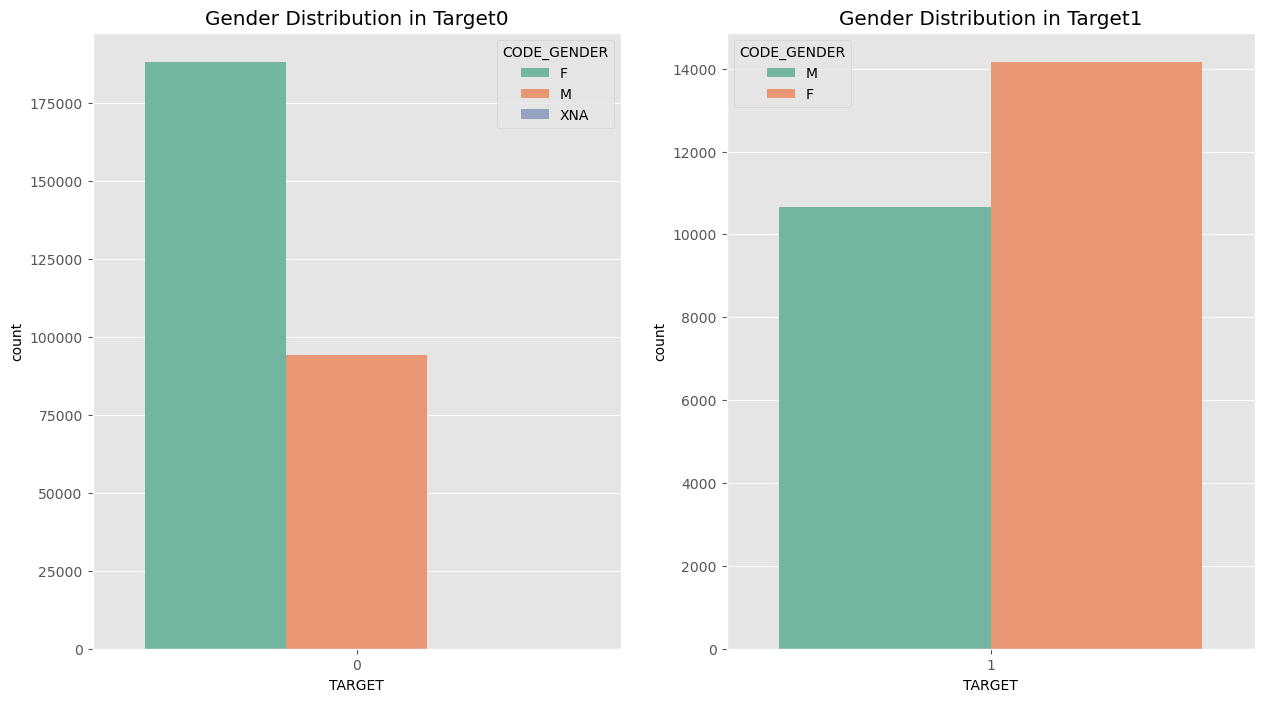

In [6]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

In [34]:
Target0.groupby('CODE_GENDER')['TARGET'].count()/len(Target0)

CODE_GENDER
F      0.666093
M      0.333893
XNA    0.000014
Name: TARGET, dtype: float64

In [35]:
Target1.groupby('CODE_GENDER')['TARGET'].count()/len(Target1)

CODE_GENDER
F    0.570651
M    0.429349
Name: TARGET, dtype: float64

# Insights:

* It seems like Female clients applied higher than male clients for loan
* 66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters.
* 57% Female clients are defaulters while 42% male clients are defaulters.

# 1.3 ORGANIZATION'S distribution based on Target 0 and Target 1

<Figure size 4000x2000 with 0 Axes>

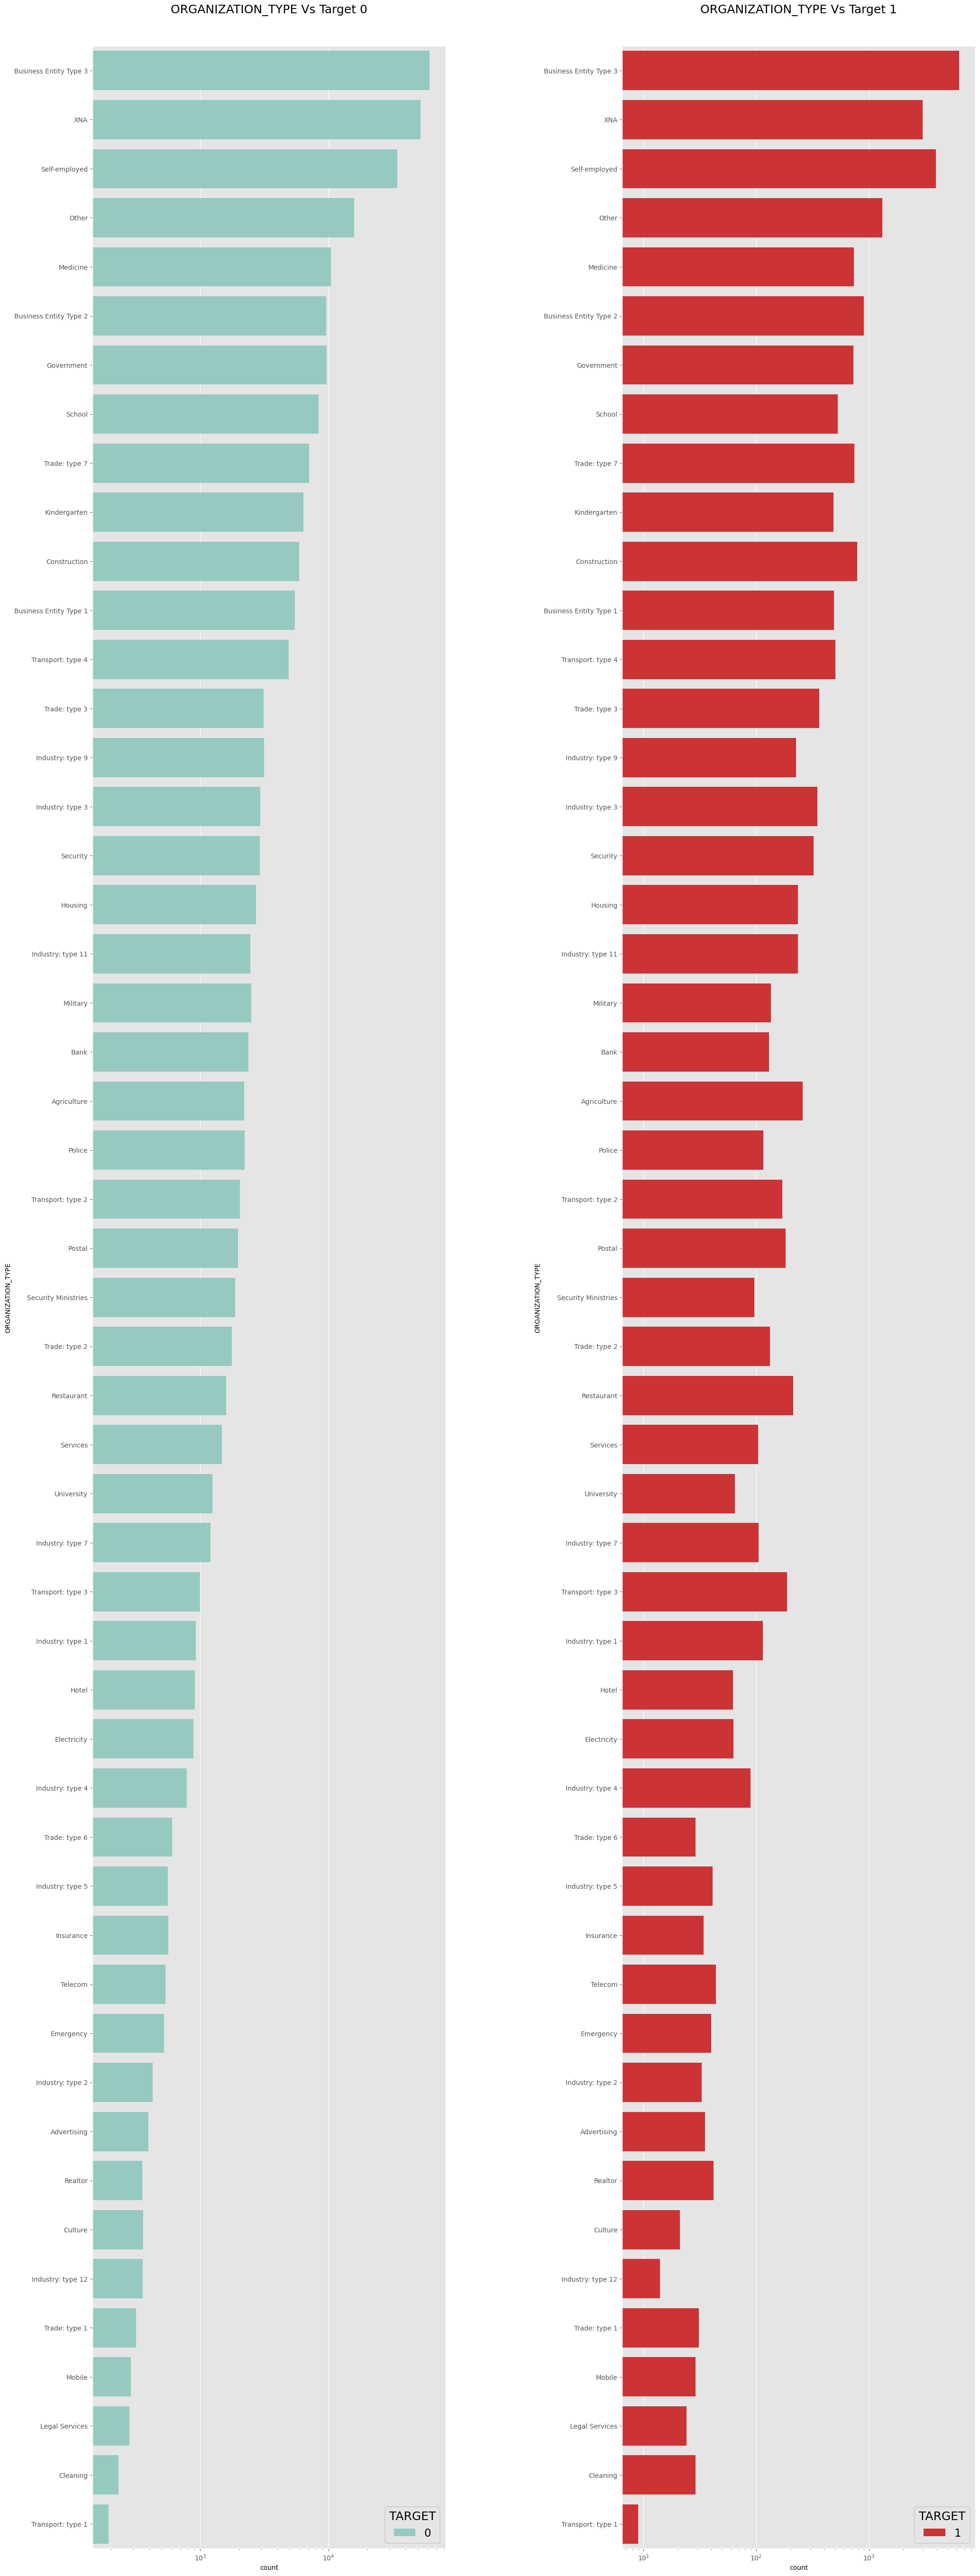

In [7]:
plt.figure(figsize=(40,20))
plt.rcParams["axes.labelsize"] = 45
plt.rcParams['axes.titlesize'] = 50                                                           # Plot Configuration 
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)                  
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 


plt.subplot(1,2,1)
plt.xscale('log')                                                                             # For Target0      
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(1,2,2)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")



plt.show();

# Insights:

* (Defaulters as well as Non-defaulters) Clients with ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 applied the most for the loan as compared to others

* (Defaulters as well as Non-defaulters) Clients having ORGANIZATION_TYPE Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8 applied lower for the loan as compared to others.



# 1.4 Similarly for below Catogrical columns

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

### it will be hectic to write a code for each.So we will create Function and for loop to plot graph for each column with specific Titles

### 1.4.1 Filtering all catogrical columns from df

In [8]:
categorical_cols = list(df.select_dtypes(include= 'object').columns) 
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [9]:
# Removing 'ORGANIZATION_TYPE','CODE_GENDER'because we have already taken up the isights from  above plots

categorical_cols.remove('ORGANIZATION_TYPE') 
categorical_cols.remove('CODE_GENDER')
categorical_cols

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [36]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner'],
      dtype=object)

### 1.4.2 Creating function to plot graphs for all the Catogrical columns WRT Target 0 and Target 1

<Figure size 1500x1000 with 0 Axes>

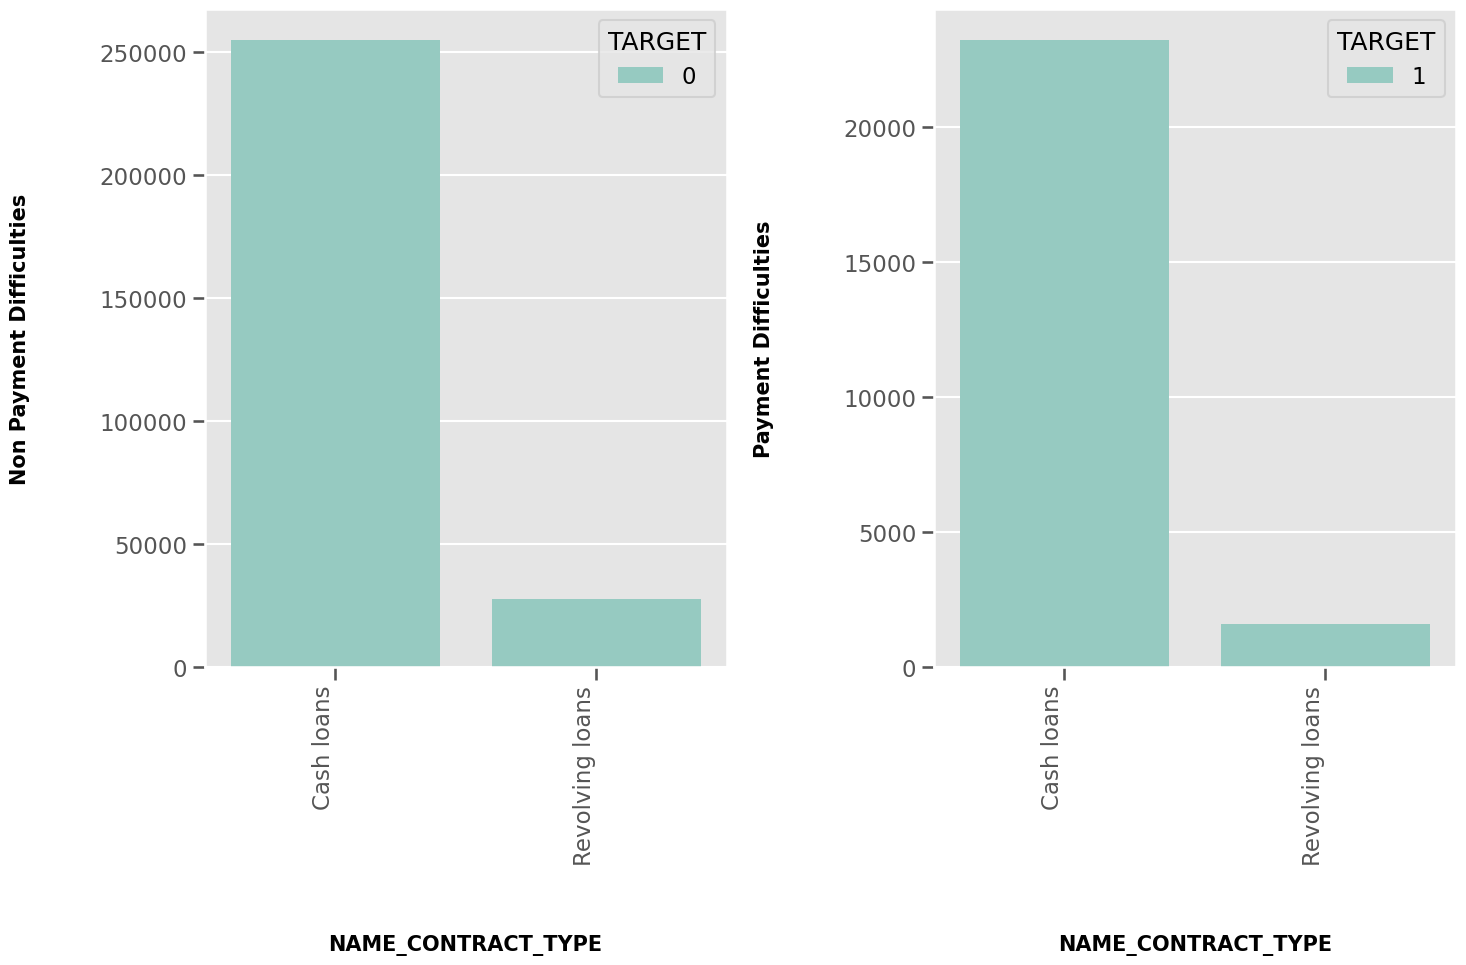

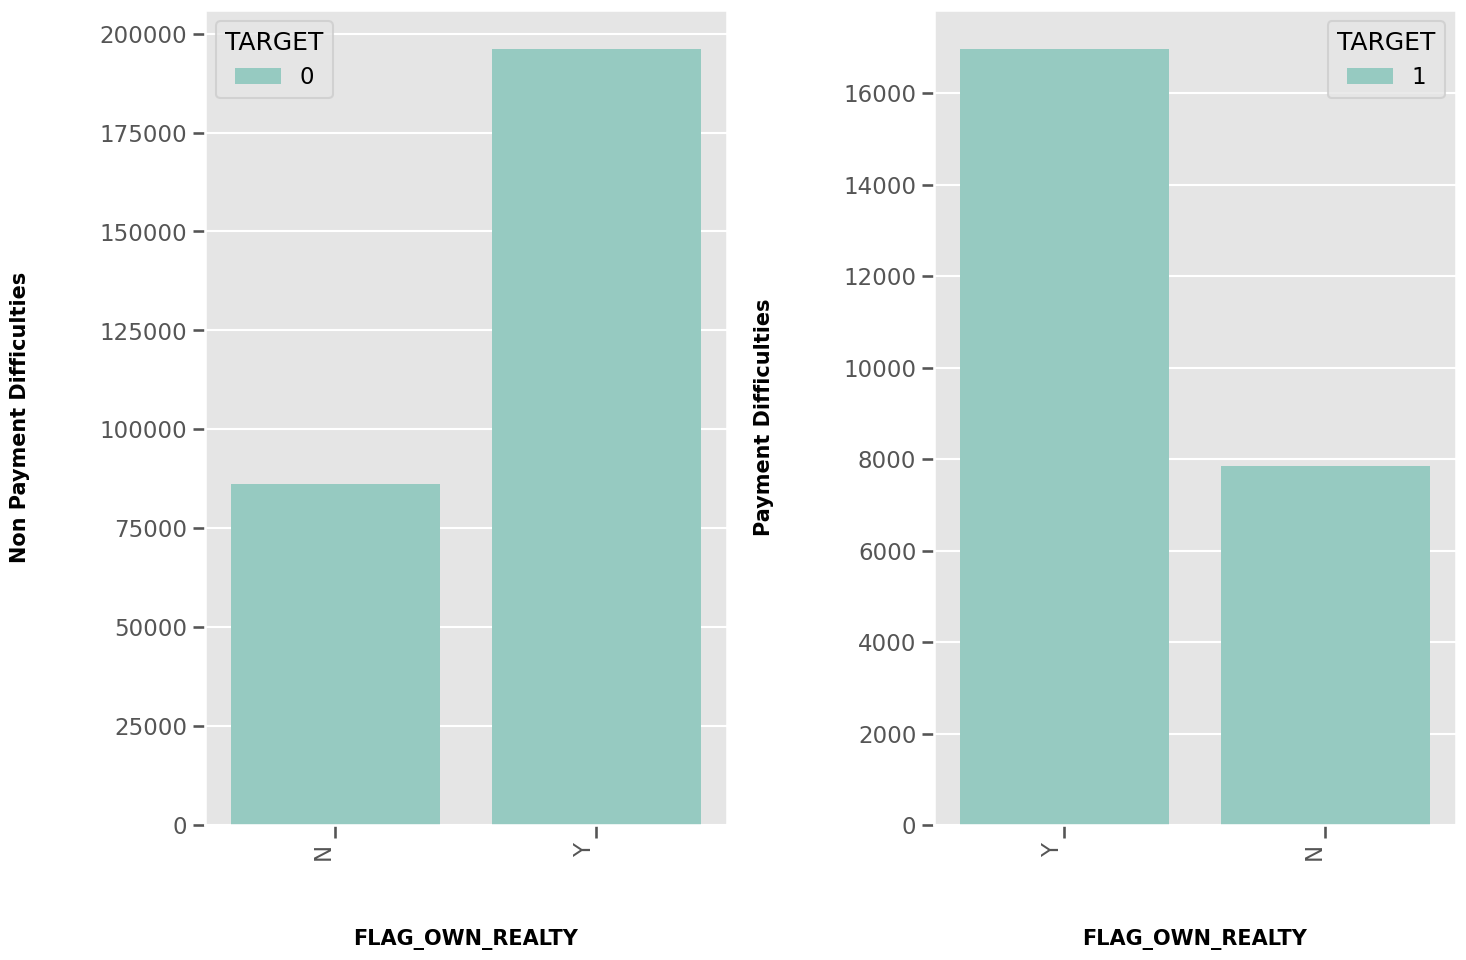

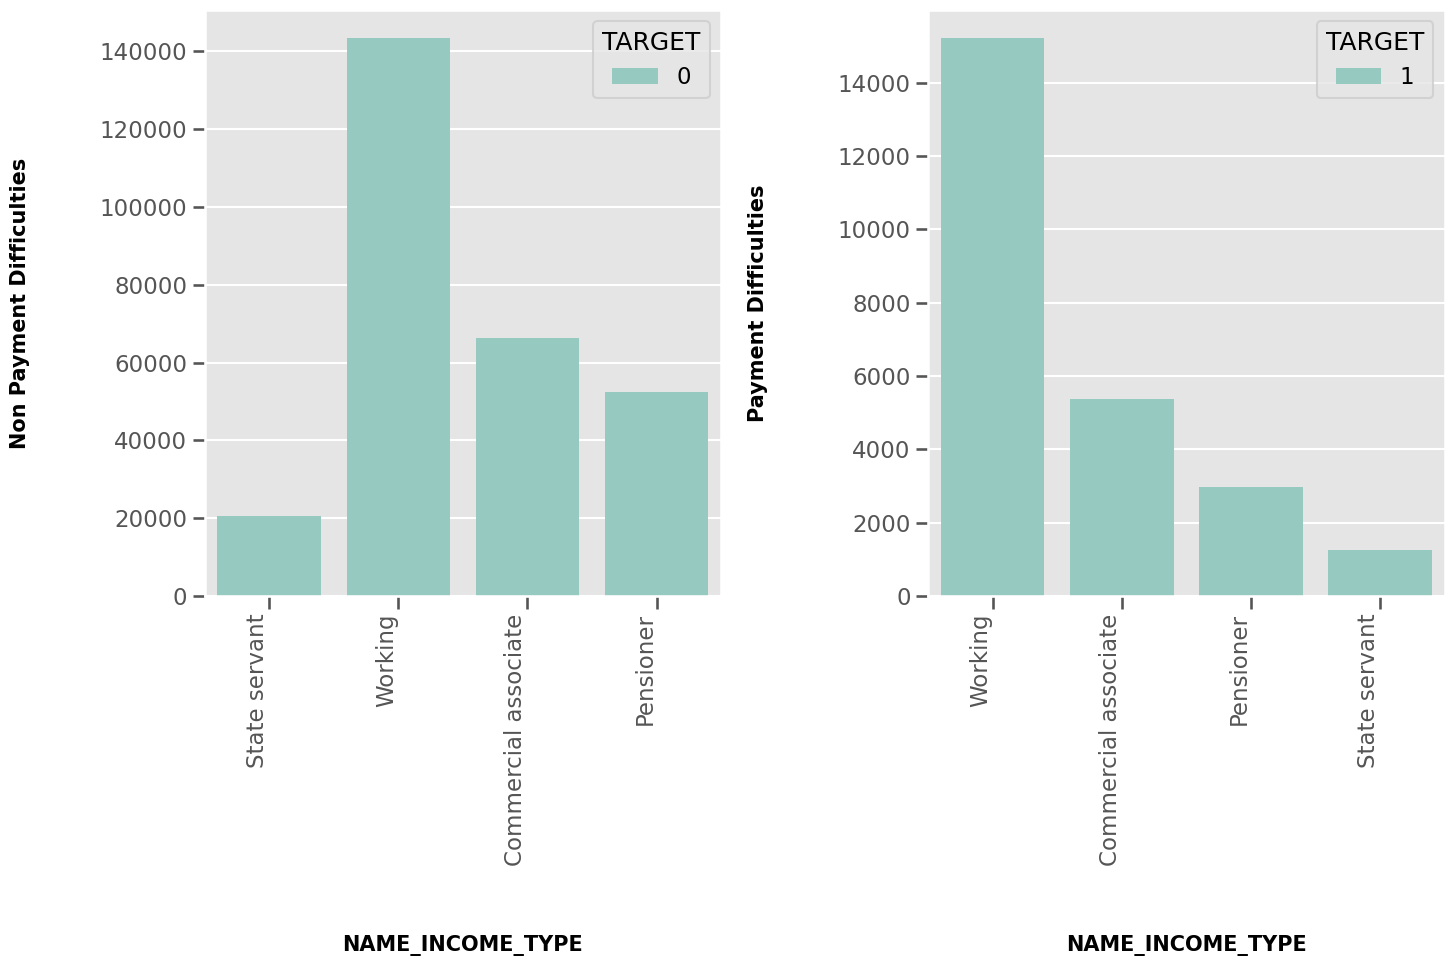

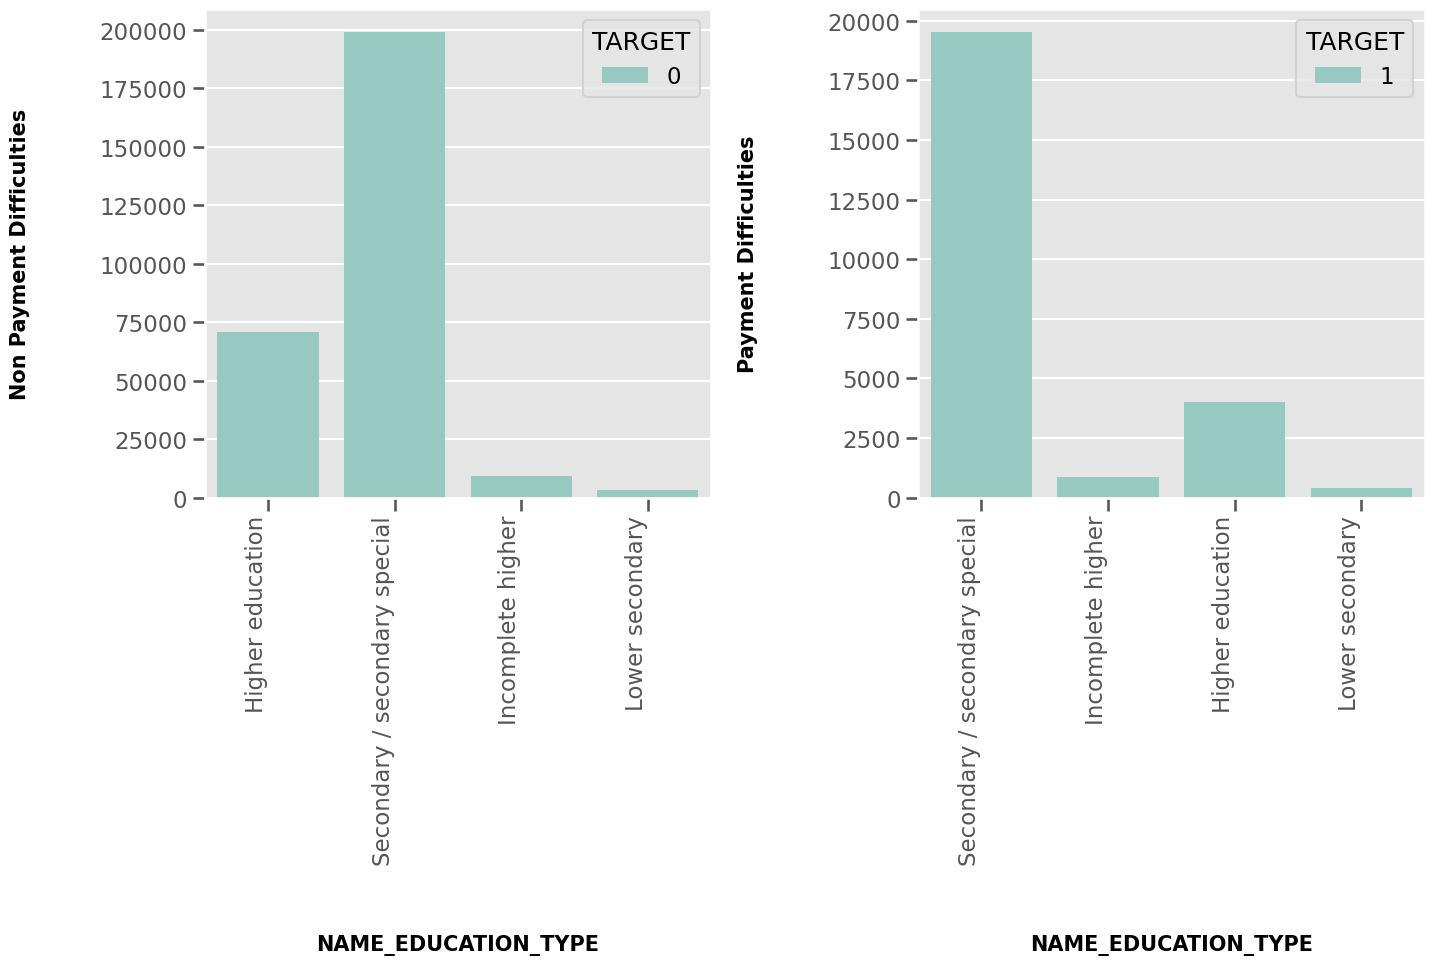

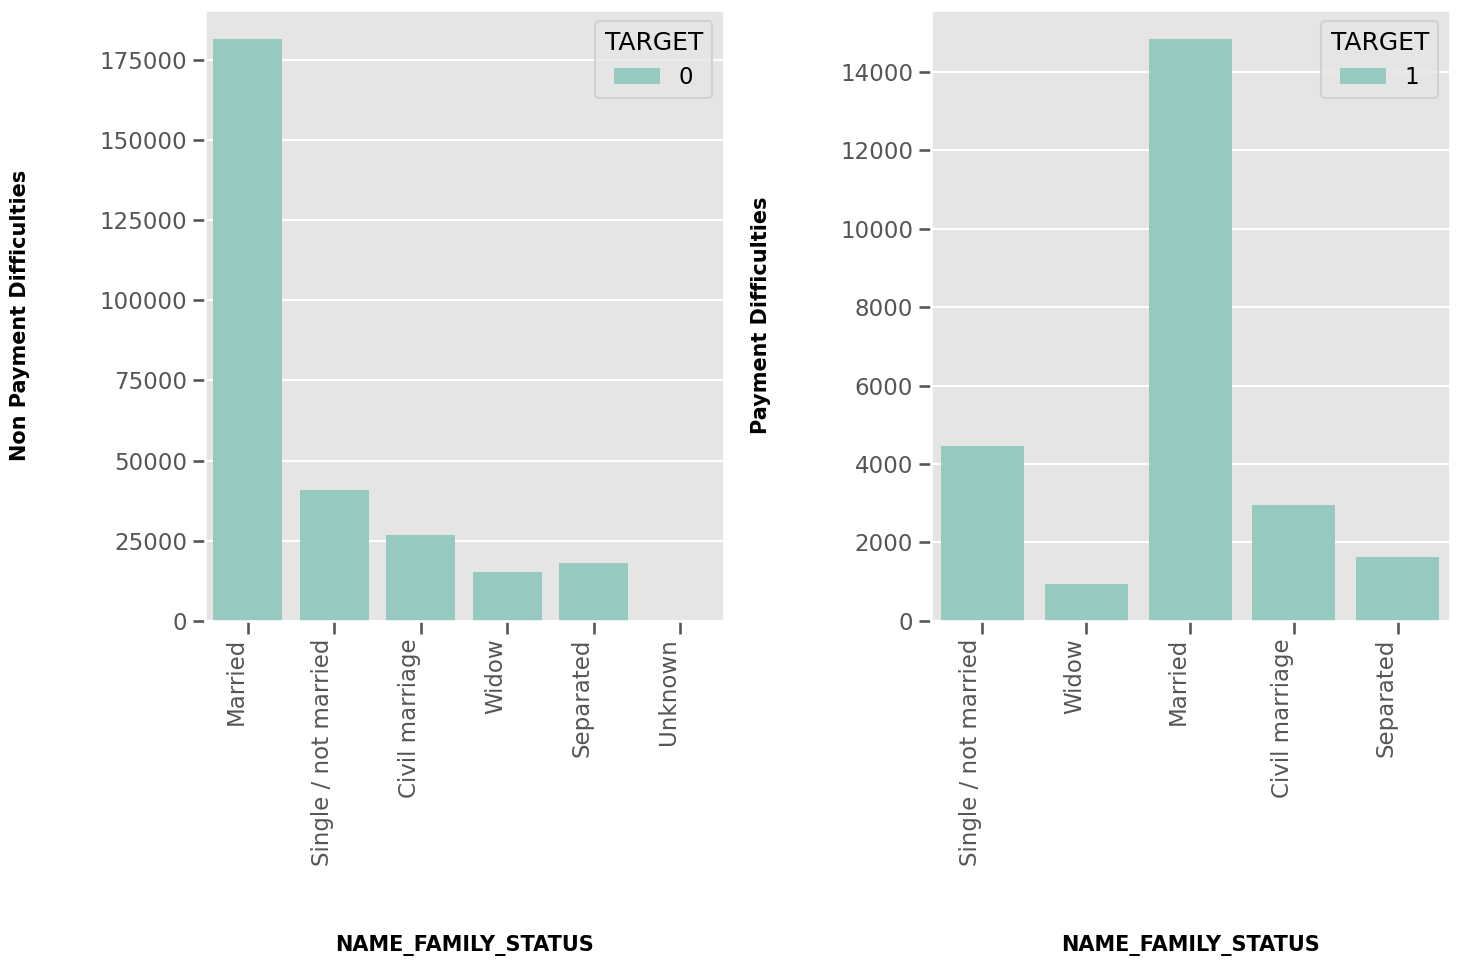

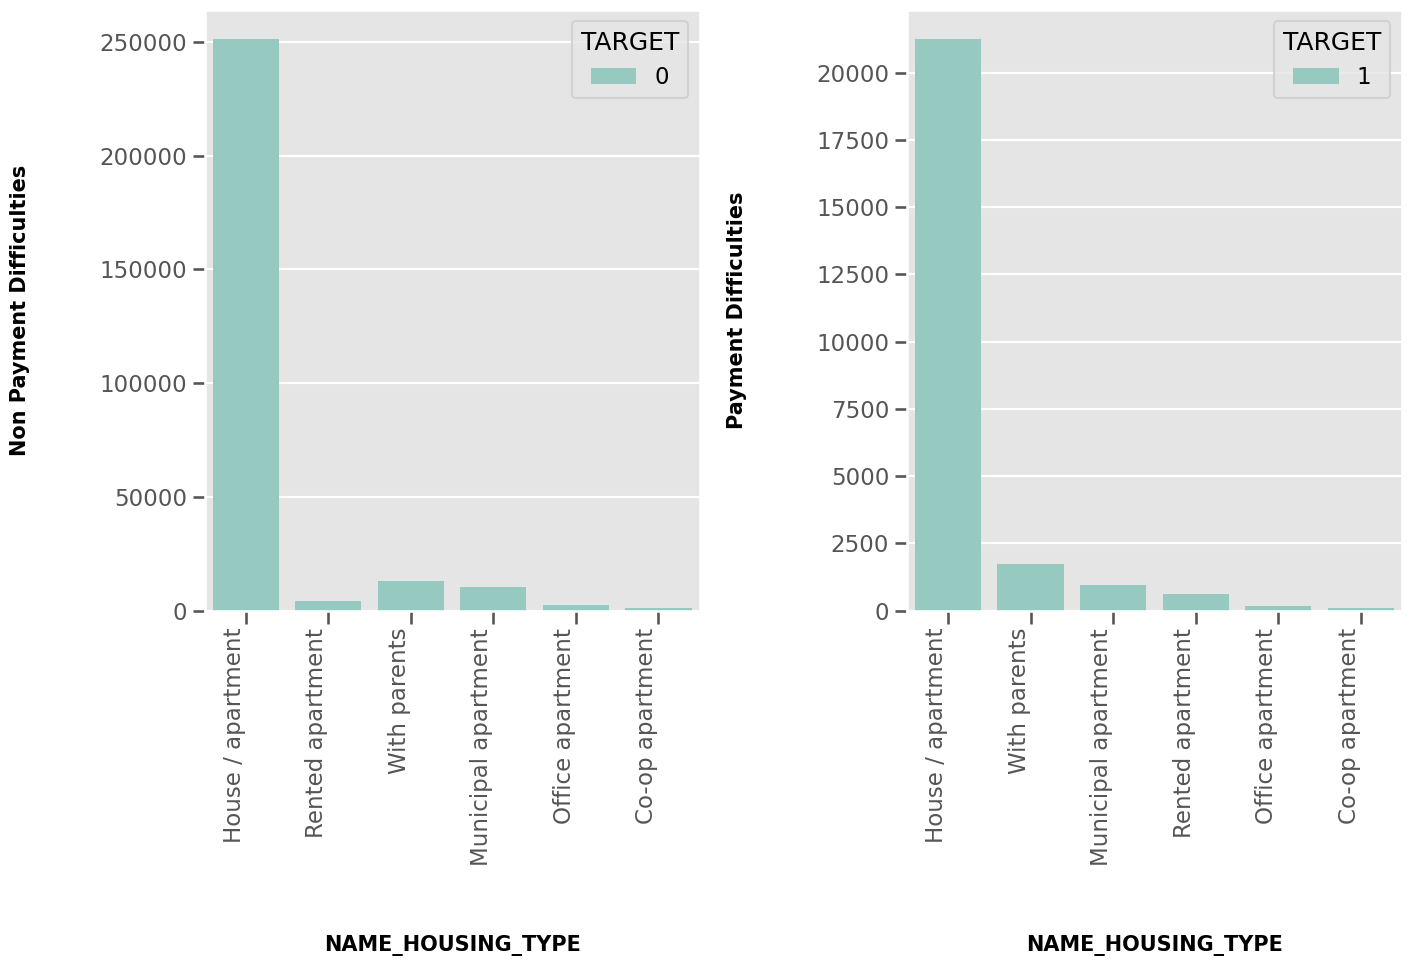

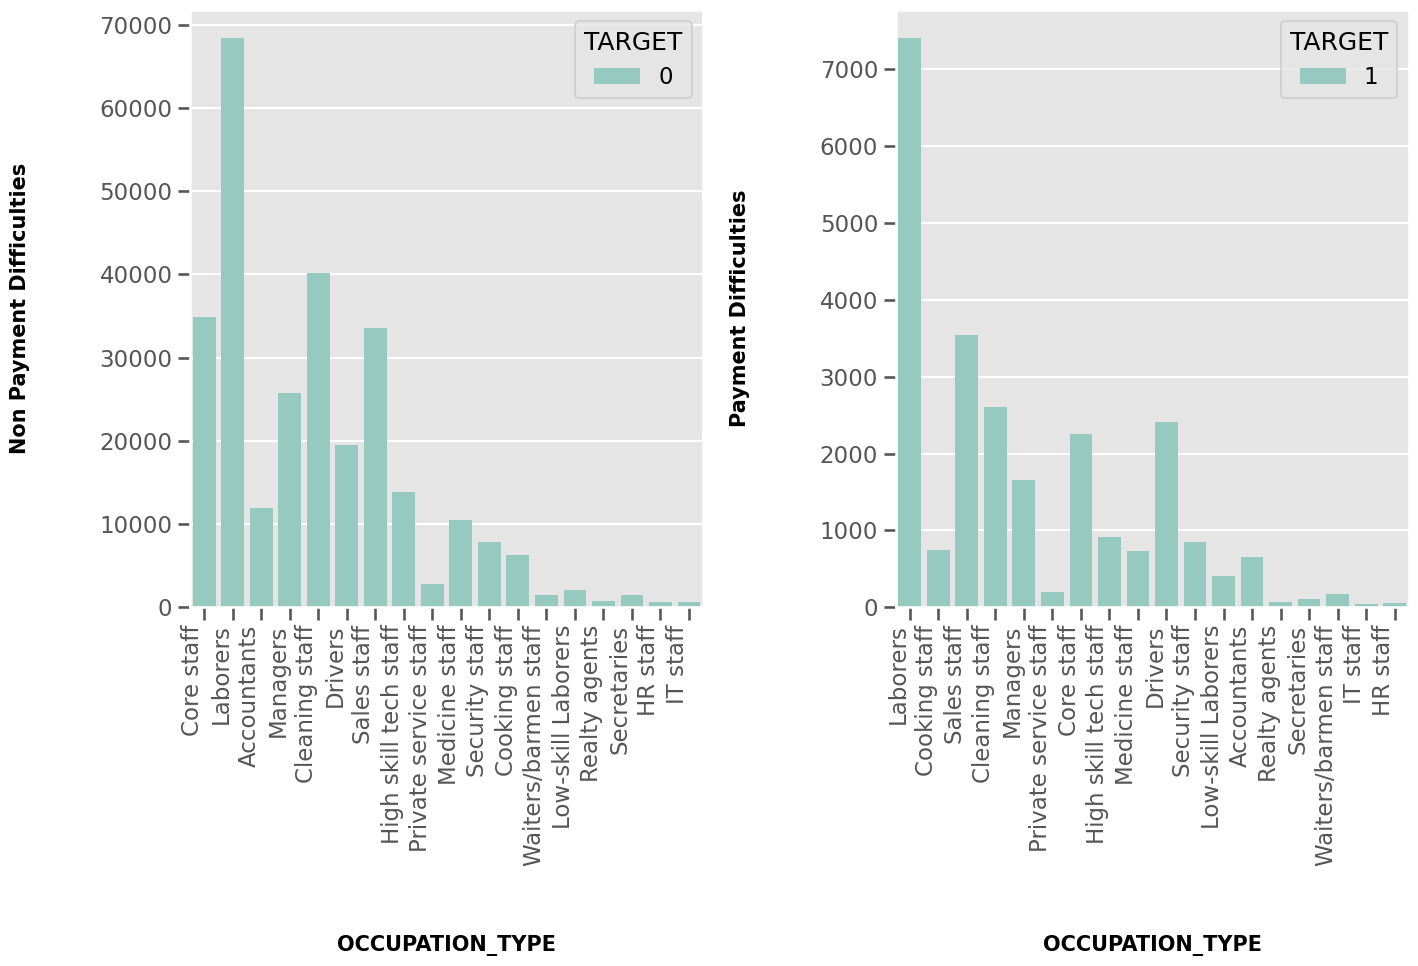

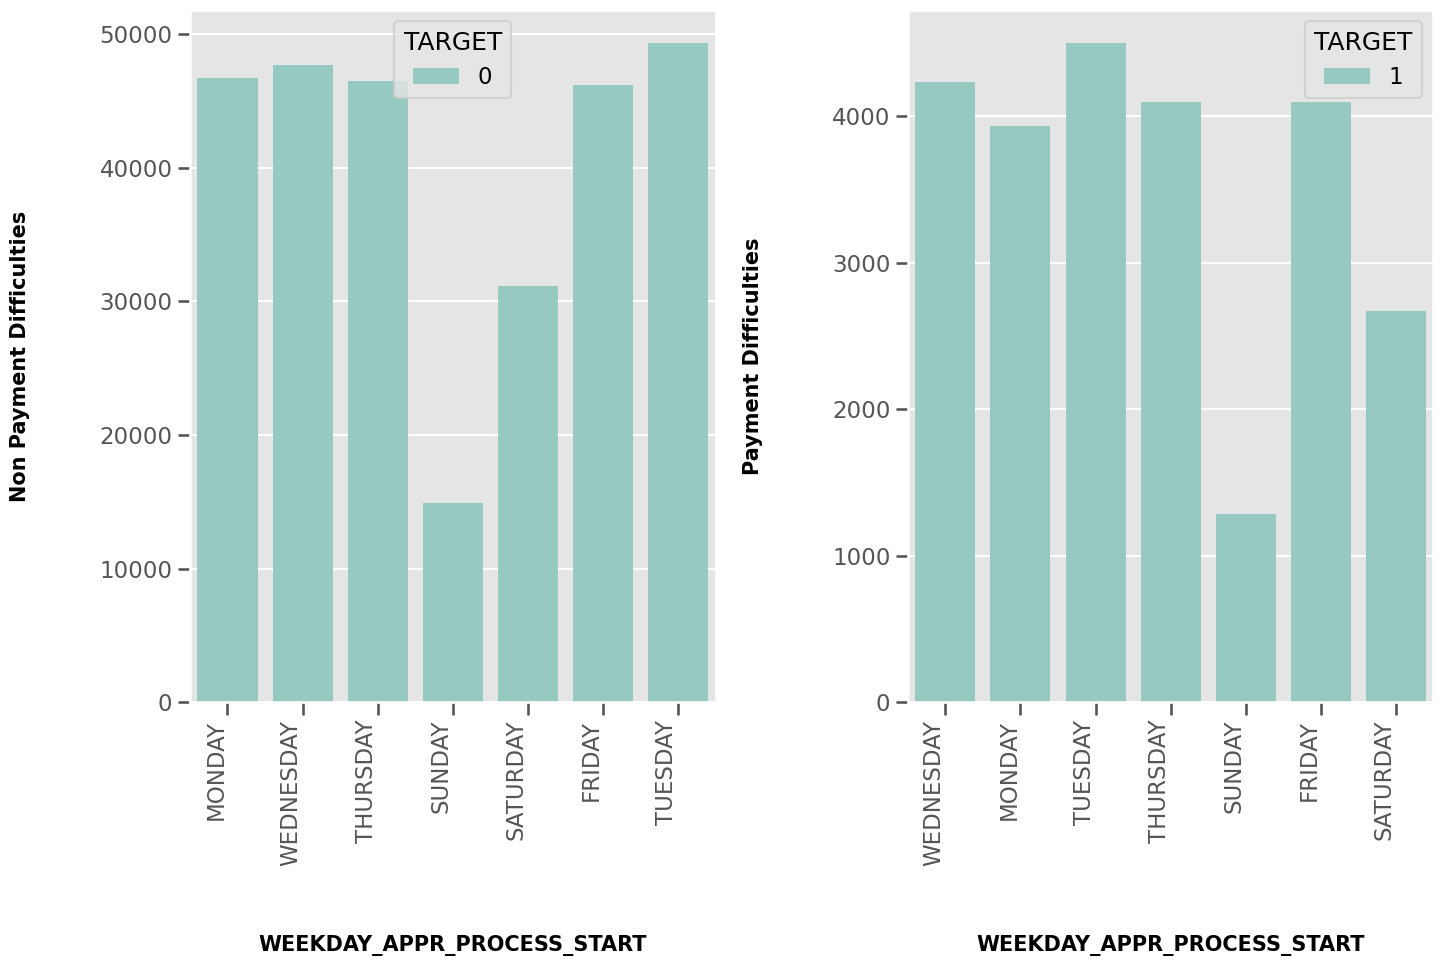

In [10]:
def plot_categorical_columns(categorical_cols, data_target0, data_target1, figsize=(12, 6)):
    # Setting the figure size for the entire plot
    plt.figure(figsize=figsize)
    
    for var in categorical_cols:
        categorical_plot(var, data_target0, data_target1, figsize)

def categorical_plot(var, data_target0, data_target1, figsize=(20,10)):
    plt.rcParams['axes.labelpad'] = 50

    # Setting the figure size for each subplot
    plt.figure(figsize=figsize)

    plt.subplot(1, 2, 1)
    sns.countplot(x=var, data=data_target0, palette='Set3', hue='TARGET') 
    plt.xlabel(var, fontsize=15, fontweight="bold")  # Target 0
    plt.ylabel('Non Payment Difficulties', fontsize=15, fontweight="bold")
    plt.xticks(rotation=90, ha='right')

    plt.subplot(1, 2, 2)
    sns.countplot(x=var, data=data_target1, palette='Set3', hue='TARGET') 
    plt.xlabel(var, fontsize=15, fontweight="bold")  # Target 1
    plt.ylabel('Payment Difficulties', fontsize=15, fontweight="bold")
    plt.tight_layout()
    plt.xticks(rotation=90, ha='right')
    plt.show()

plot_categorical_columns(categorical_cols, Target0, Target1, figsize=(15,10))

## Insights:

1. `NAME_CONTRACT_TYPE` :
> - **Most of the clients** have applied for `Cash Loan` while **very small proportion ** have applied for `Revolving loan` for both Defaulters as well as  Non-defaulters.
2. `NAME_INCOME_TYPE`:
> - Clients who applied for loans were getting income by  **Working Professional** are more likely to apply for the loan, highest being the `Working class category` .
> - **State servant** are less likely to apply for loan .
> - **Working category** have high risk to default.
> - **State Servant** is at Minimal risk to default.
3. `NAME_EDUCATION_TYPE`:
> - Clients having education `Secondary or Secondary Special` are more likey to apply for the loan.
> - Clients having education `Secondary or Secondary Special` have higher risk to default.Other education types have minimal risk.
4. `NAME_FAMILY_STATUS` :
> - **Married Clients** seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters.
> - In case of Defaulters,Clients having single relationship are **less risky**
> - In case of Defaulters, Widows shows **Minimal risk**.
5. `NAME_HOUSING_TYPE`:
> - From the bar chart, it is clear that Most of the clients **own a house or living in a apartment** for both Defaulters and Non-Defaulters.
6. `OCCUPATION_TYPE`:
> - Laborers have applied the most for the loan in case of Defaulters and Non-Defaulters.
> - Laborers being highest followed by `Cleaning Staff` have high risk to default.
7. `WEEKDAY_APPR_PROCESS_START`:
> - There is no considerable difference in days for both Defaulters and Non-defaulters.
8. `FLAG_OWN_REALTY`:
> - Clients who owns a realty have applied the most for the loan.

# 2.2 Univariante Analysis of Numerical columns with respect to Target variable

## 2.2.1 Creating Function's for univariate plots


In [11]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();
    

###  2.2.2 Loan Annuity based on  Target 0 and Target 1

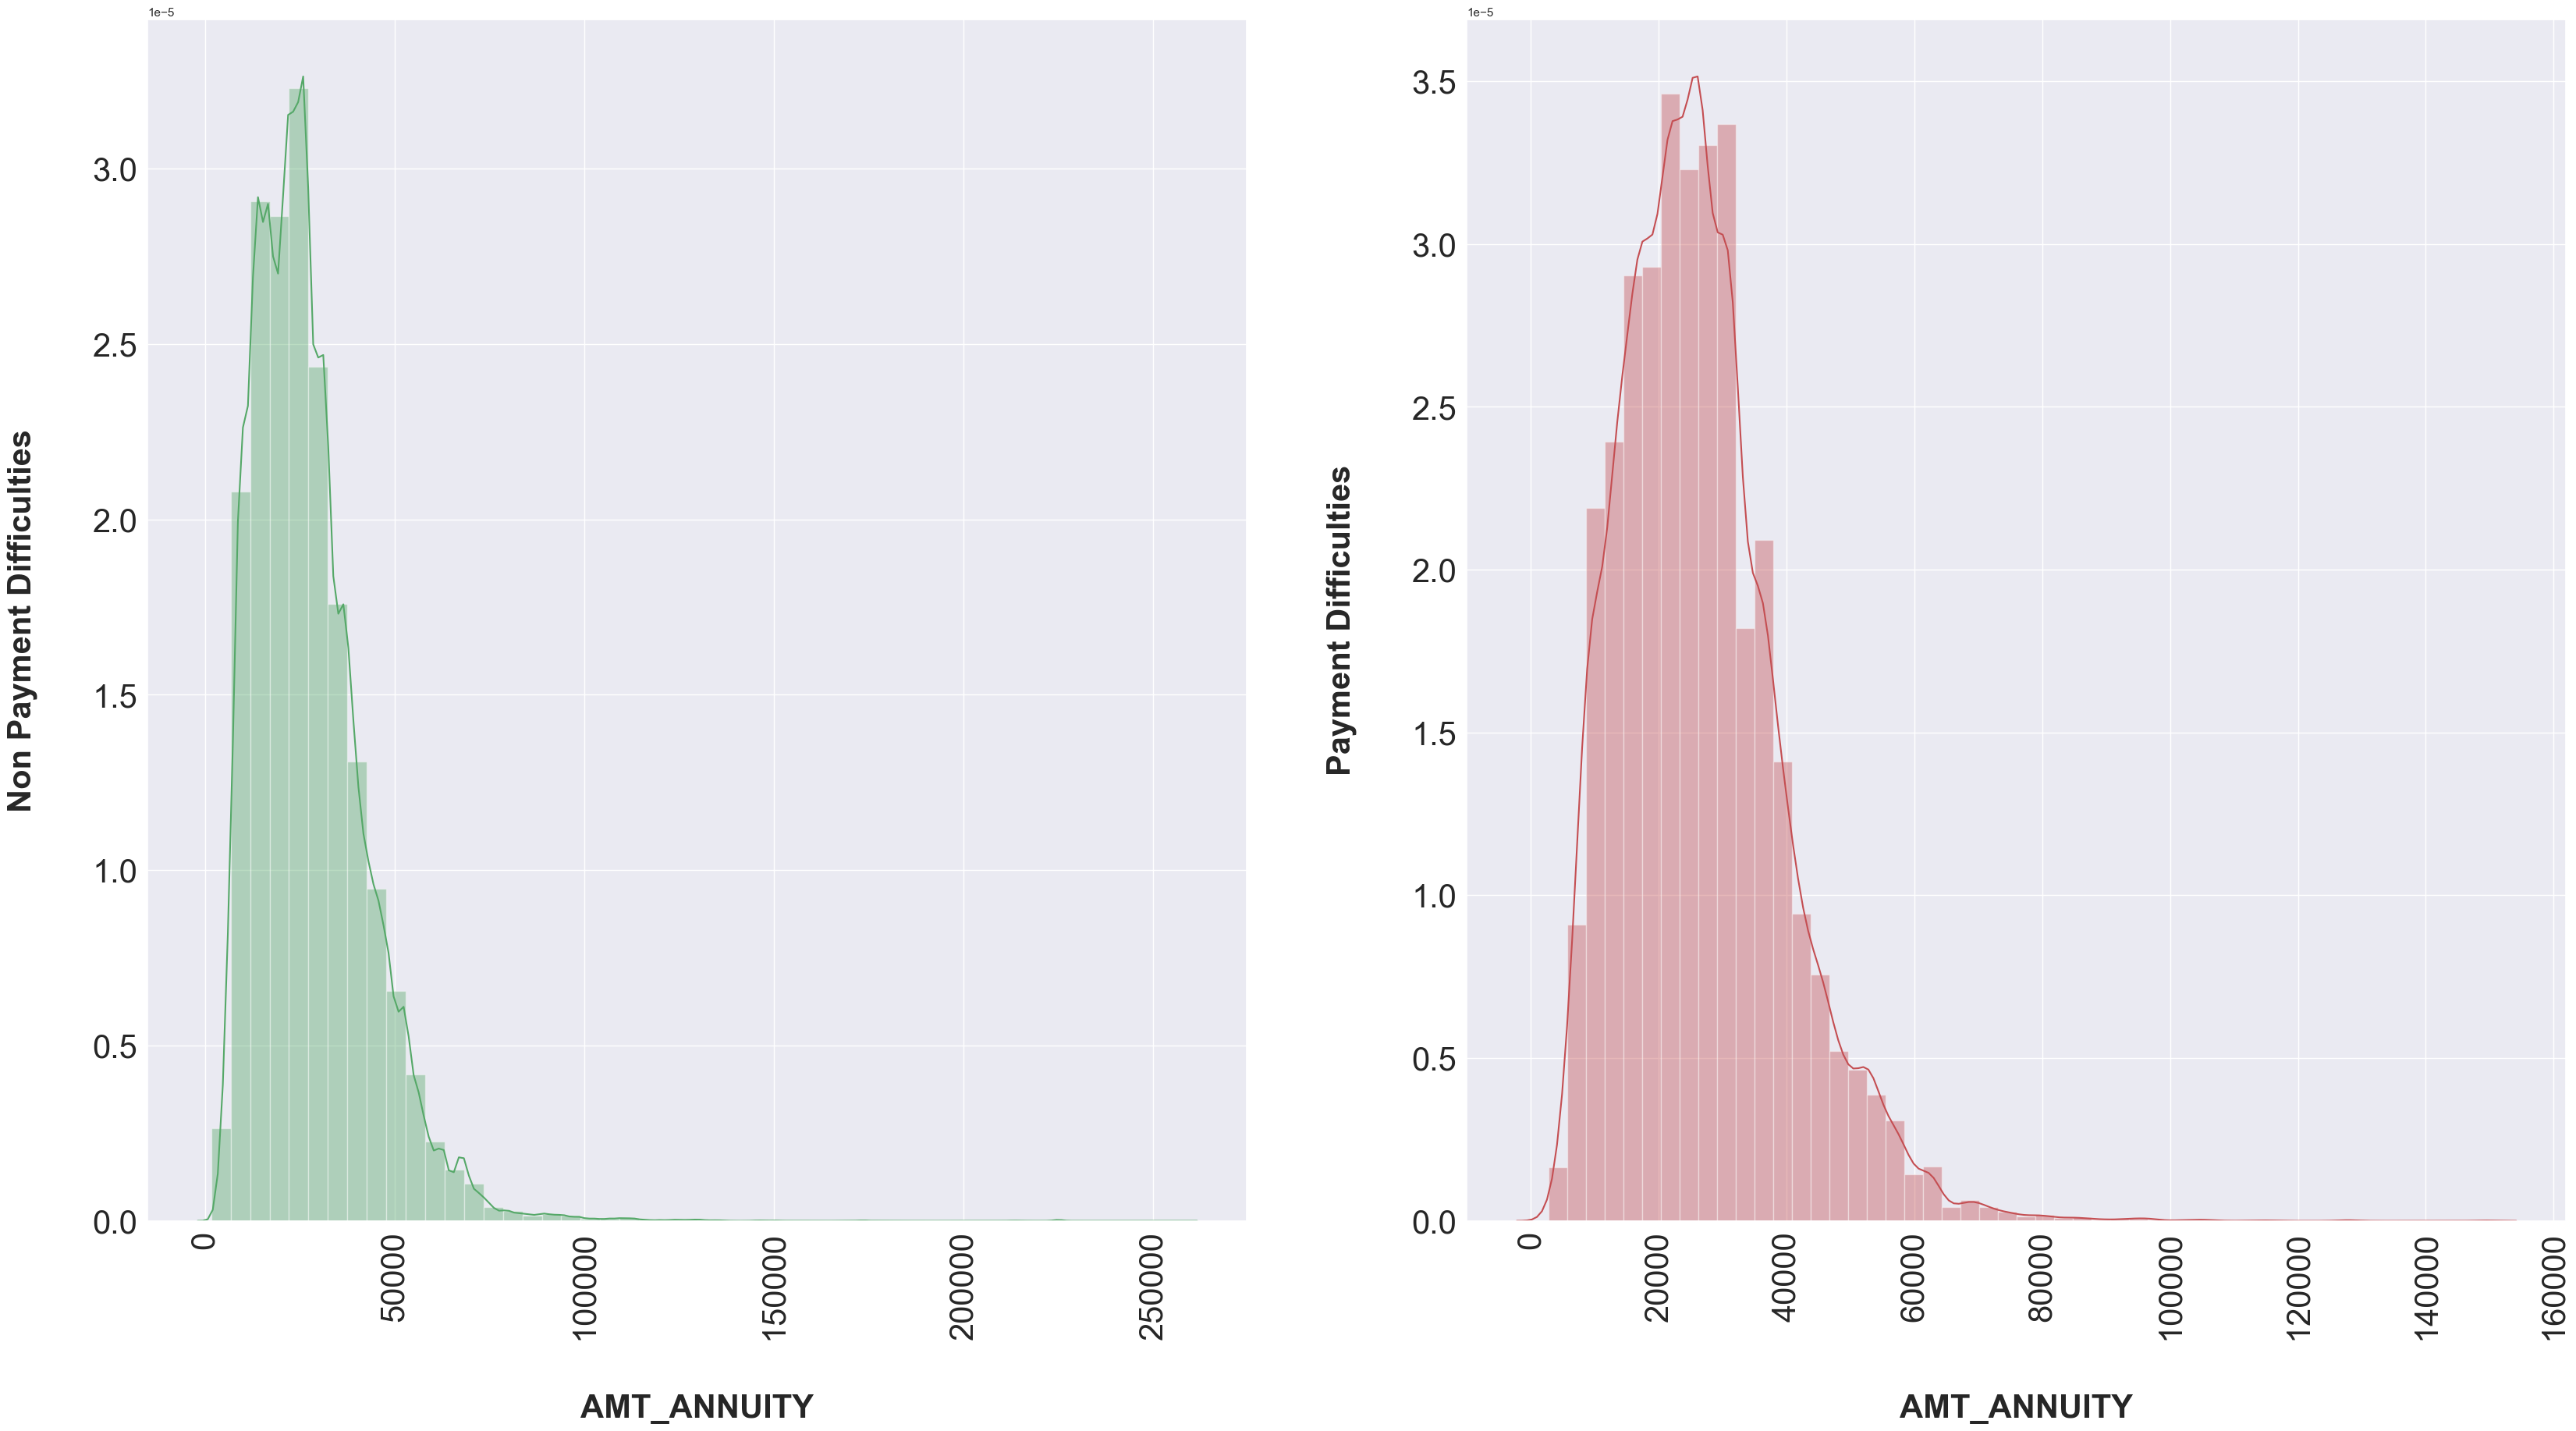

In [12]:
uni(col='AMT_ANNUITY')               

###  2.2.3 Credit Amount based on  Target 0 and Target 1

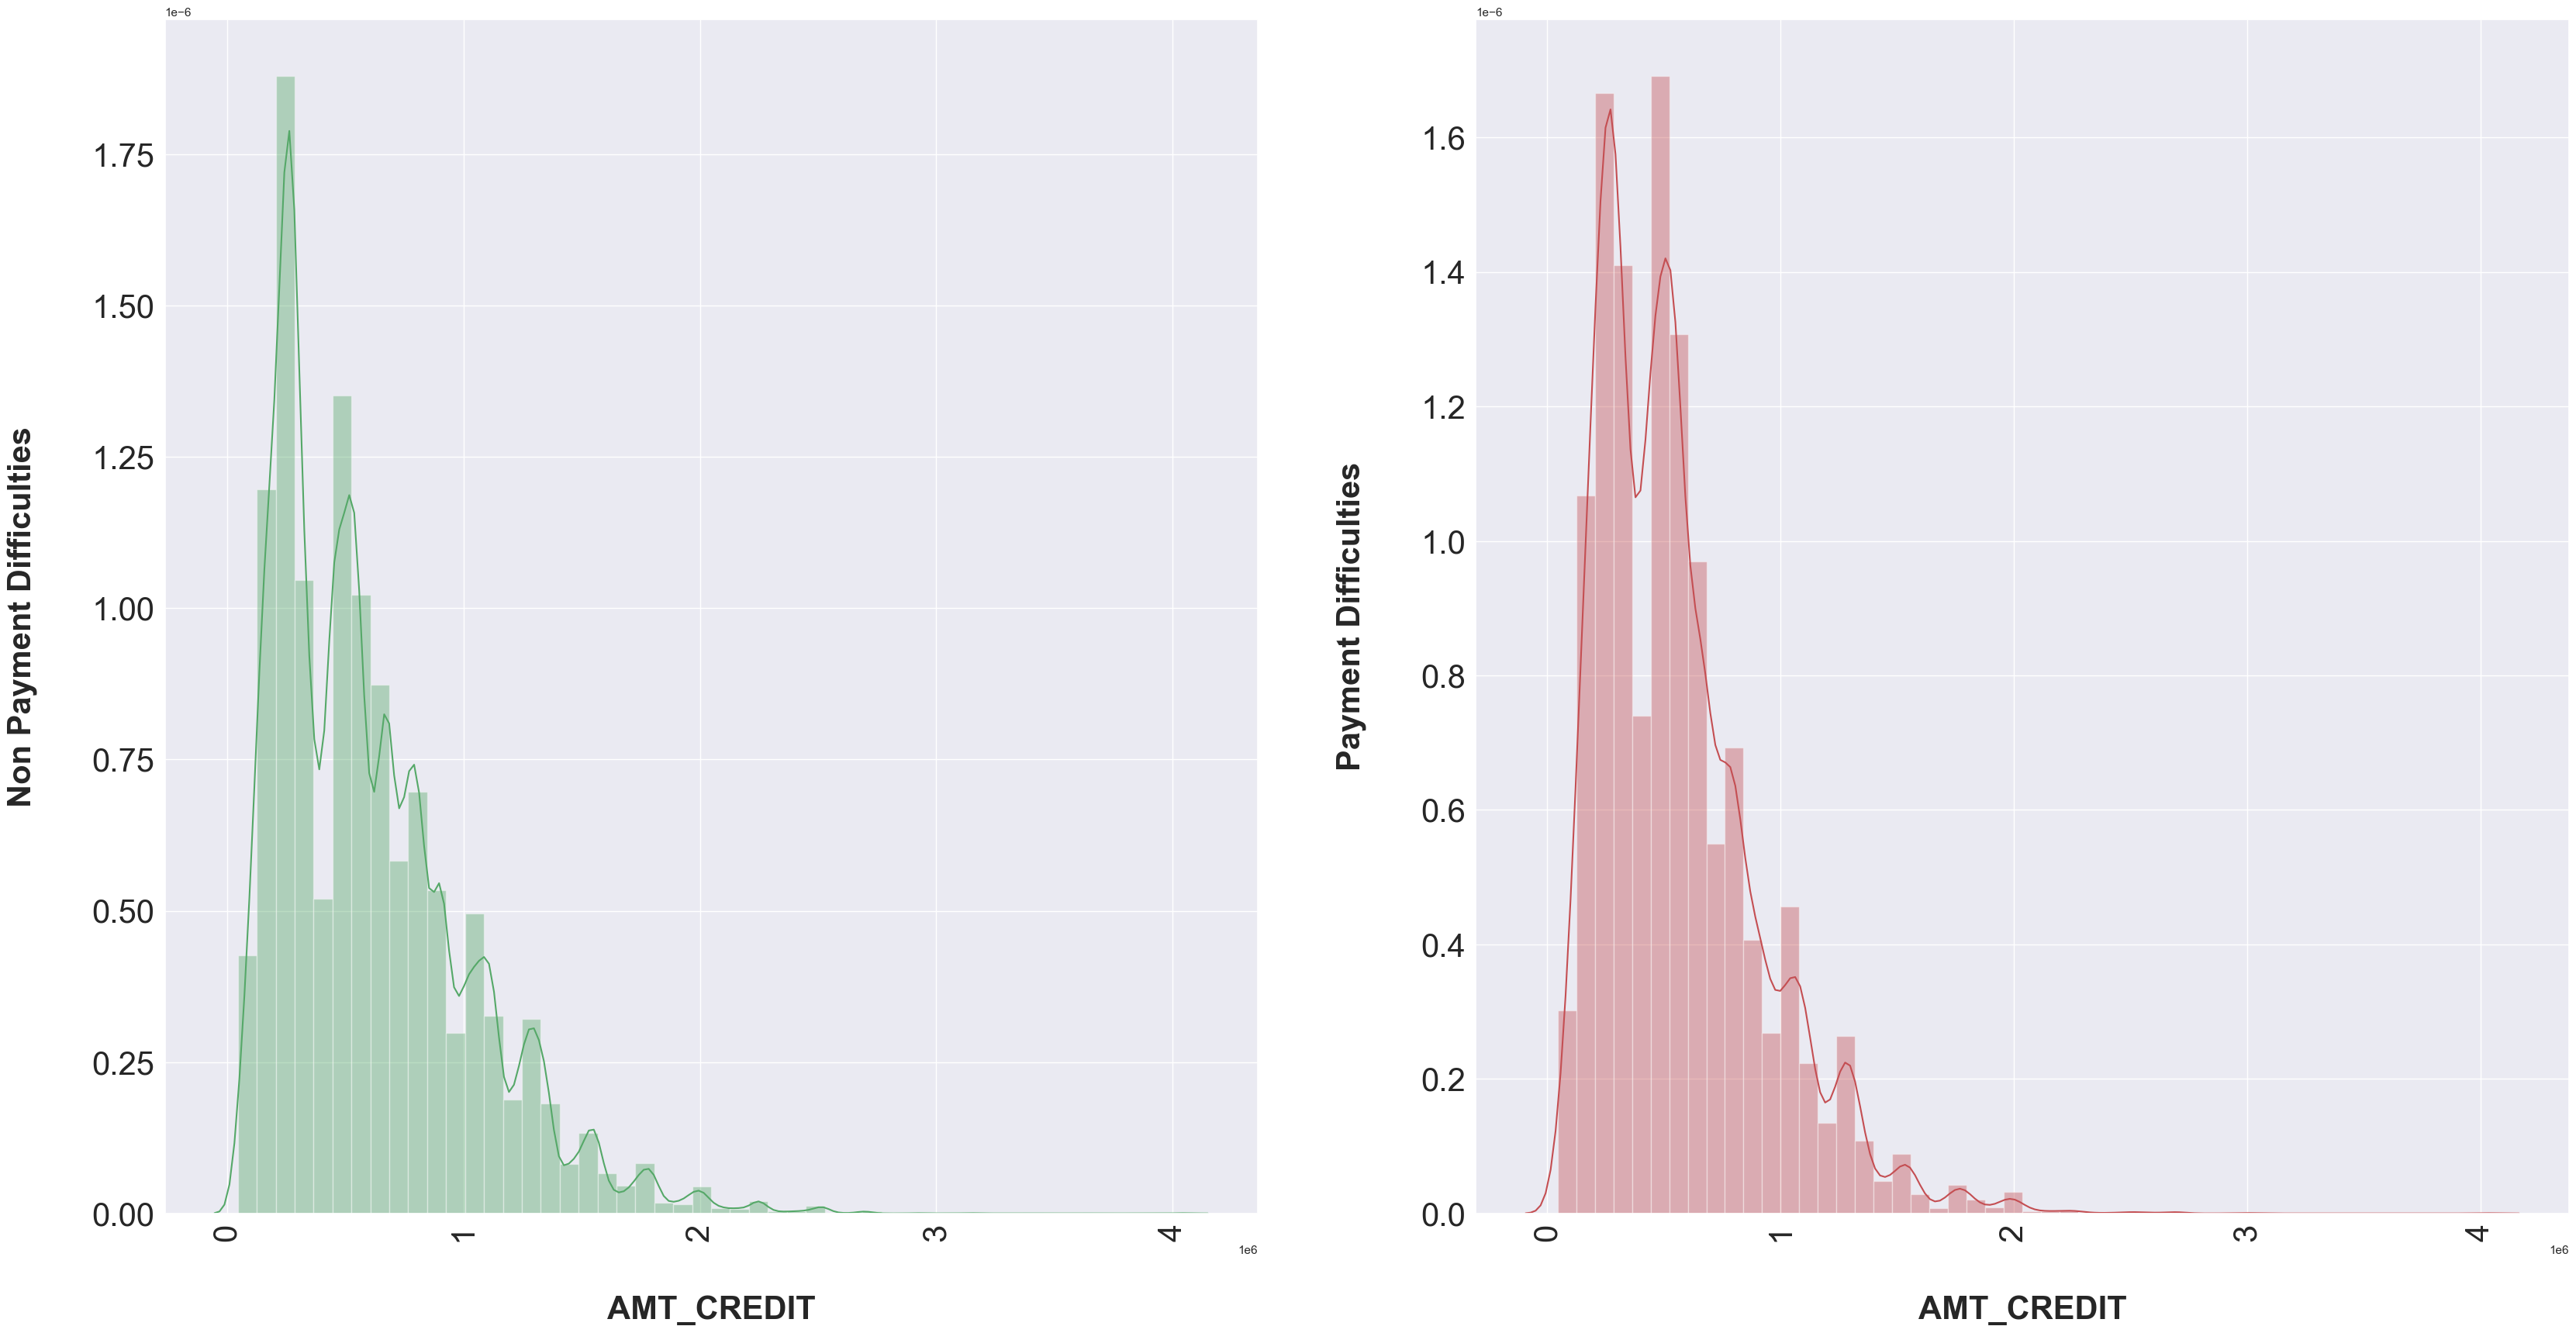

In [13]:
uni(col='AMT_CREDIT')           

### 2.2.4 Price of Goods based on  Target 0 and Target 1

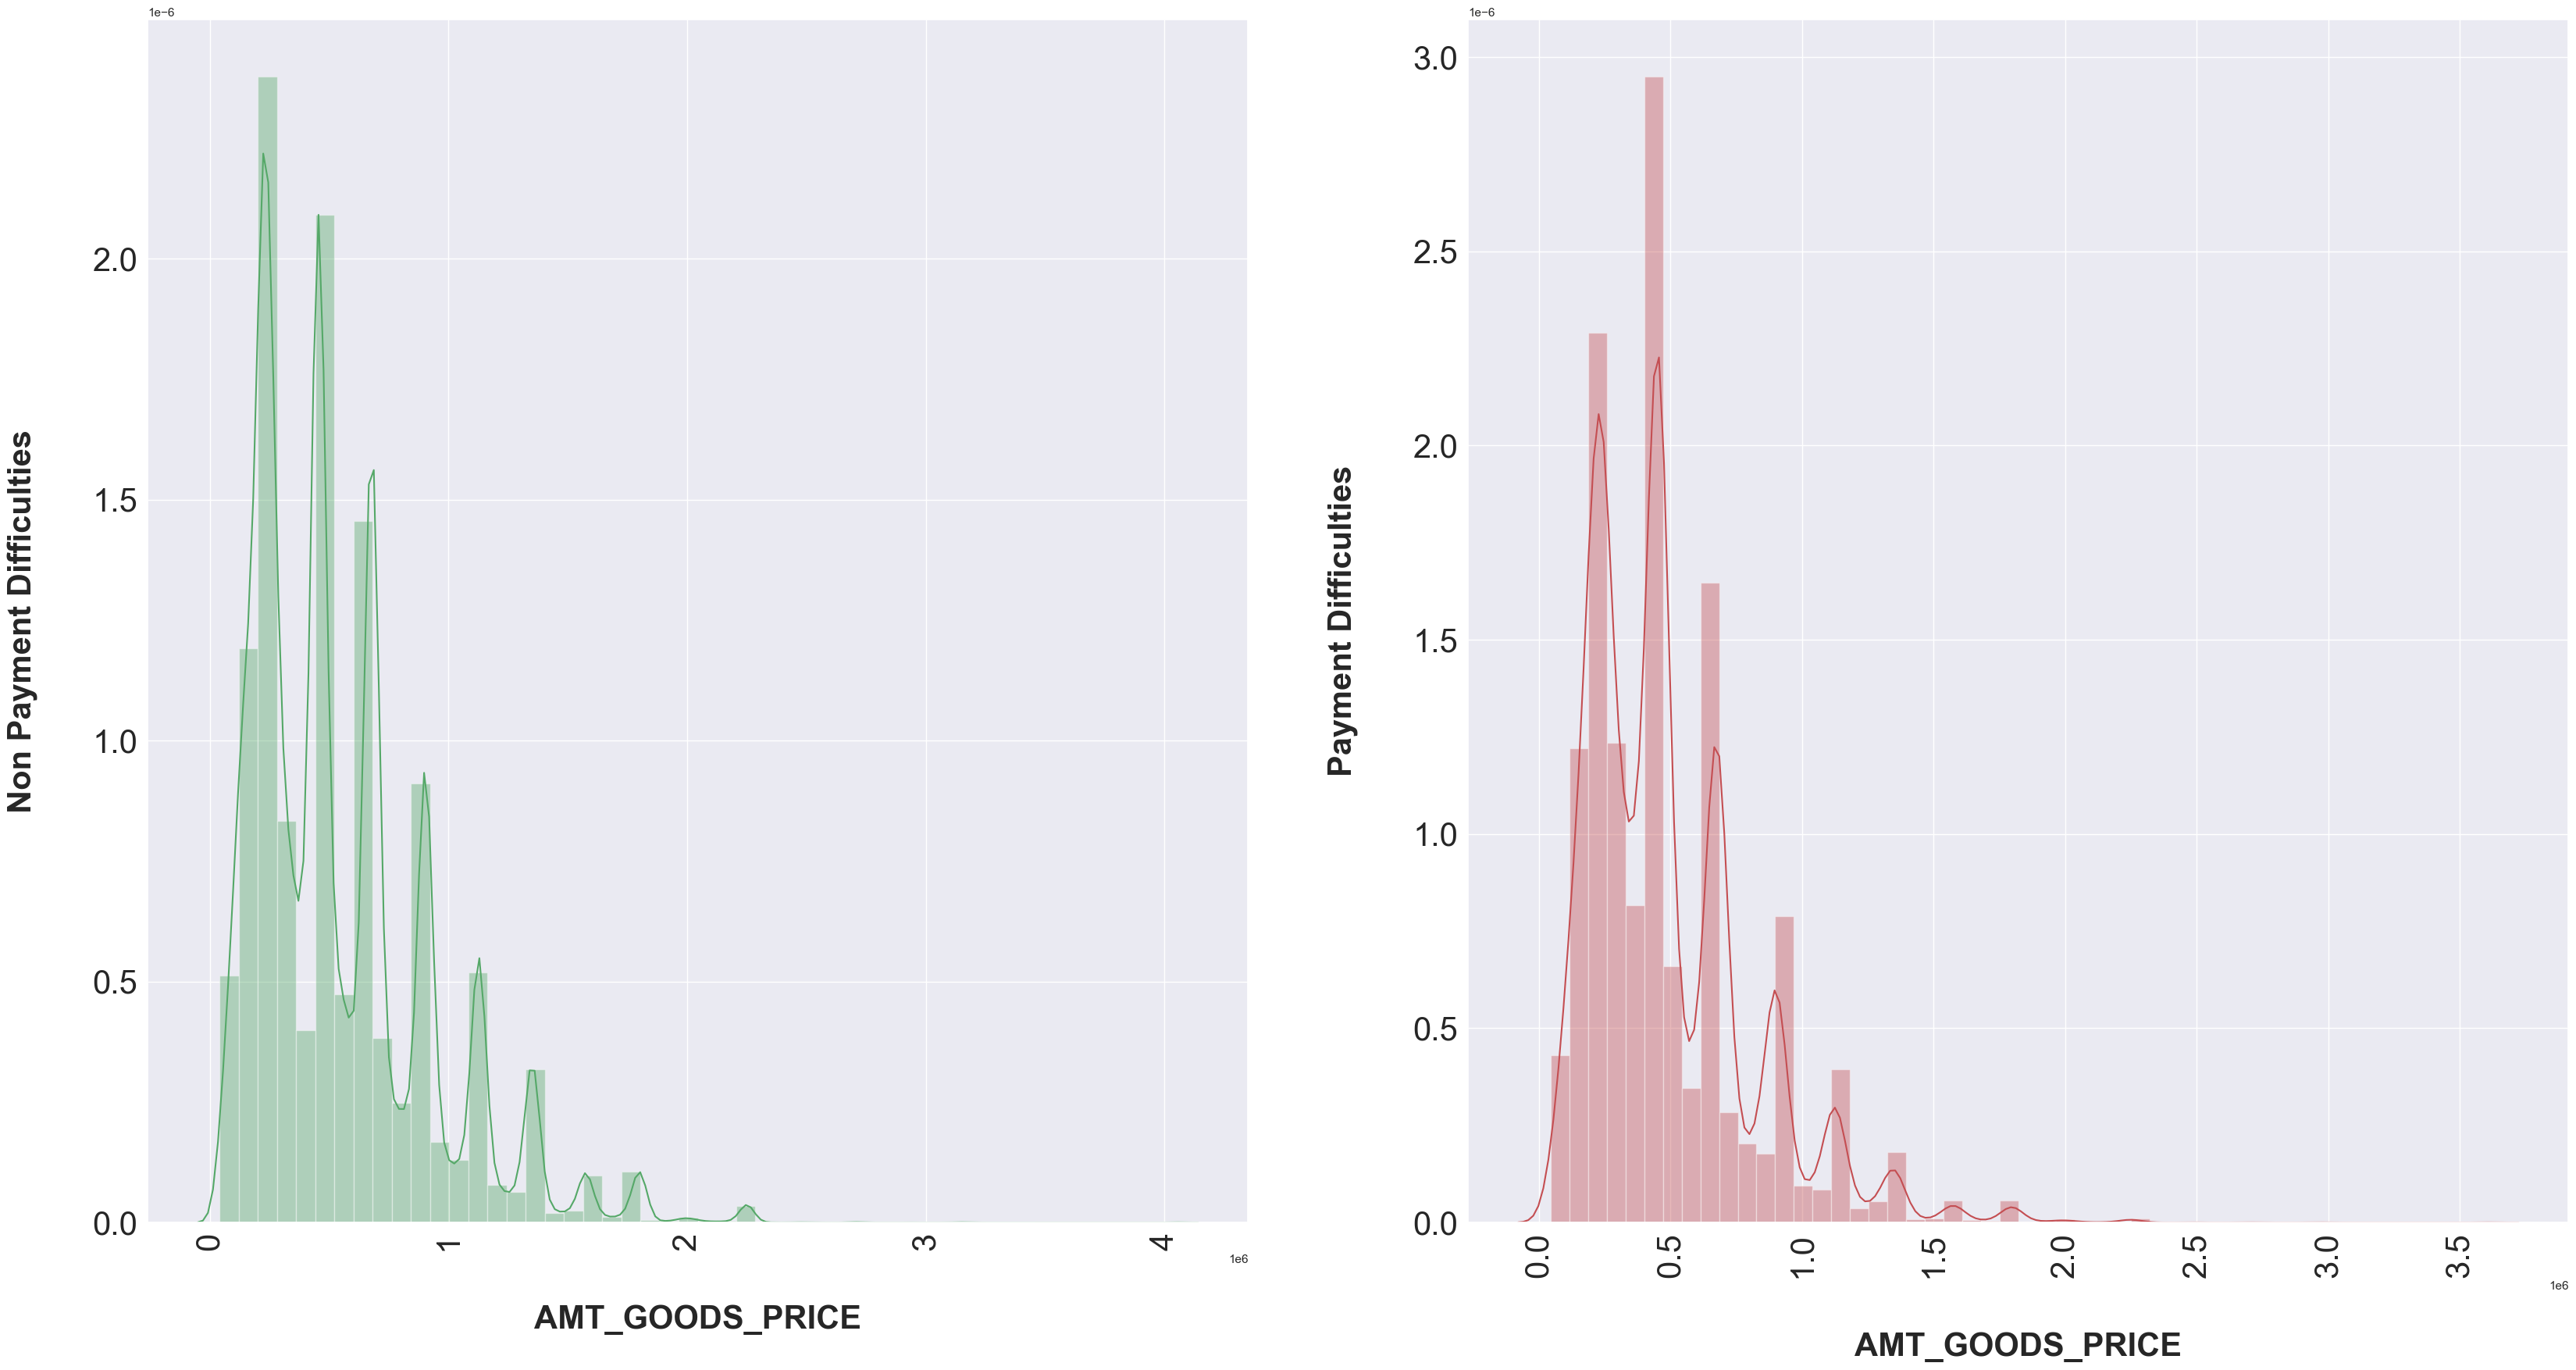

In [14]:
uni(col='AMT_GOODS_PRICE')          

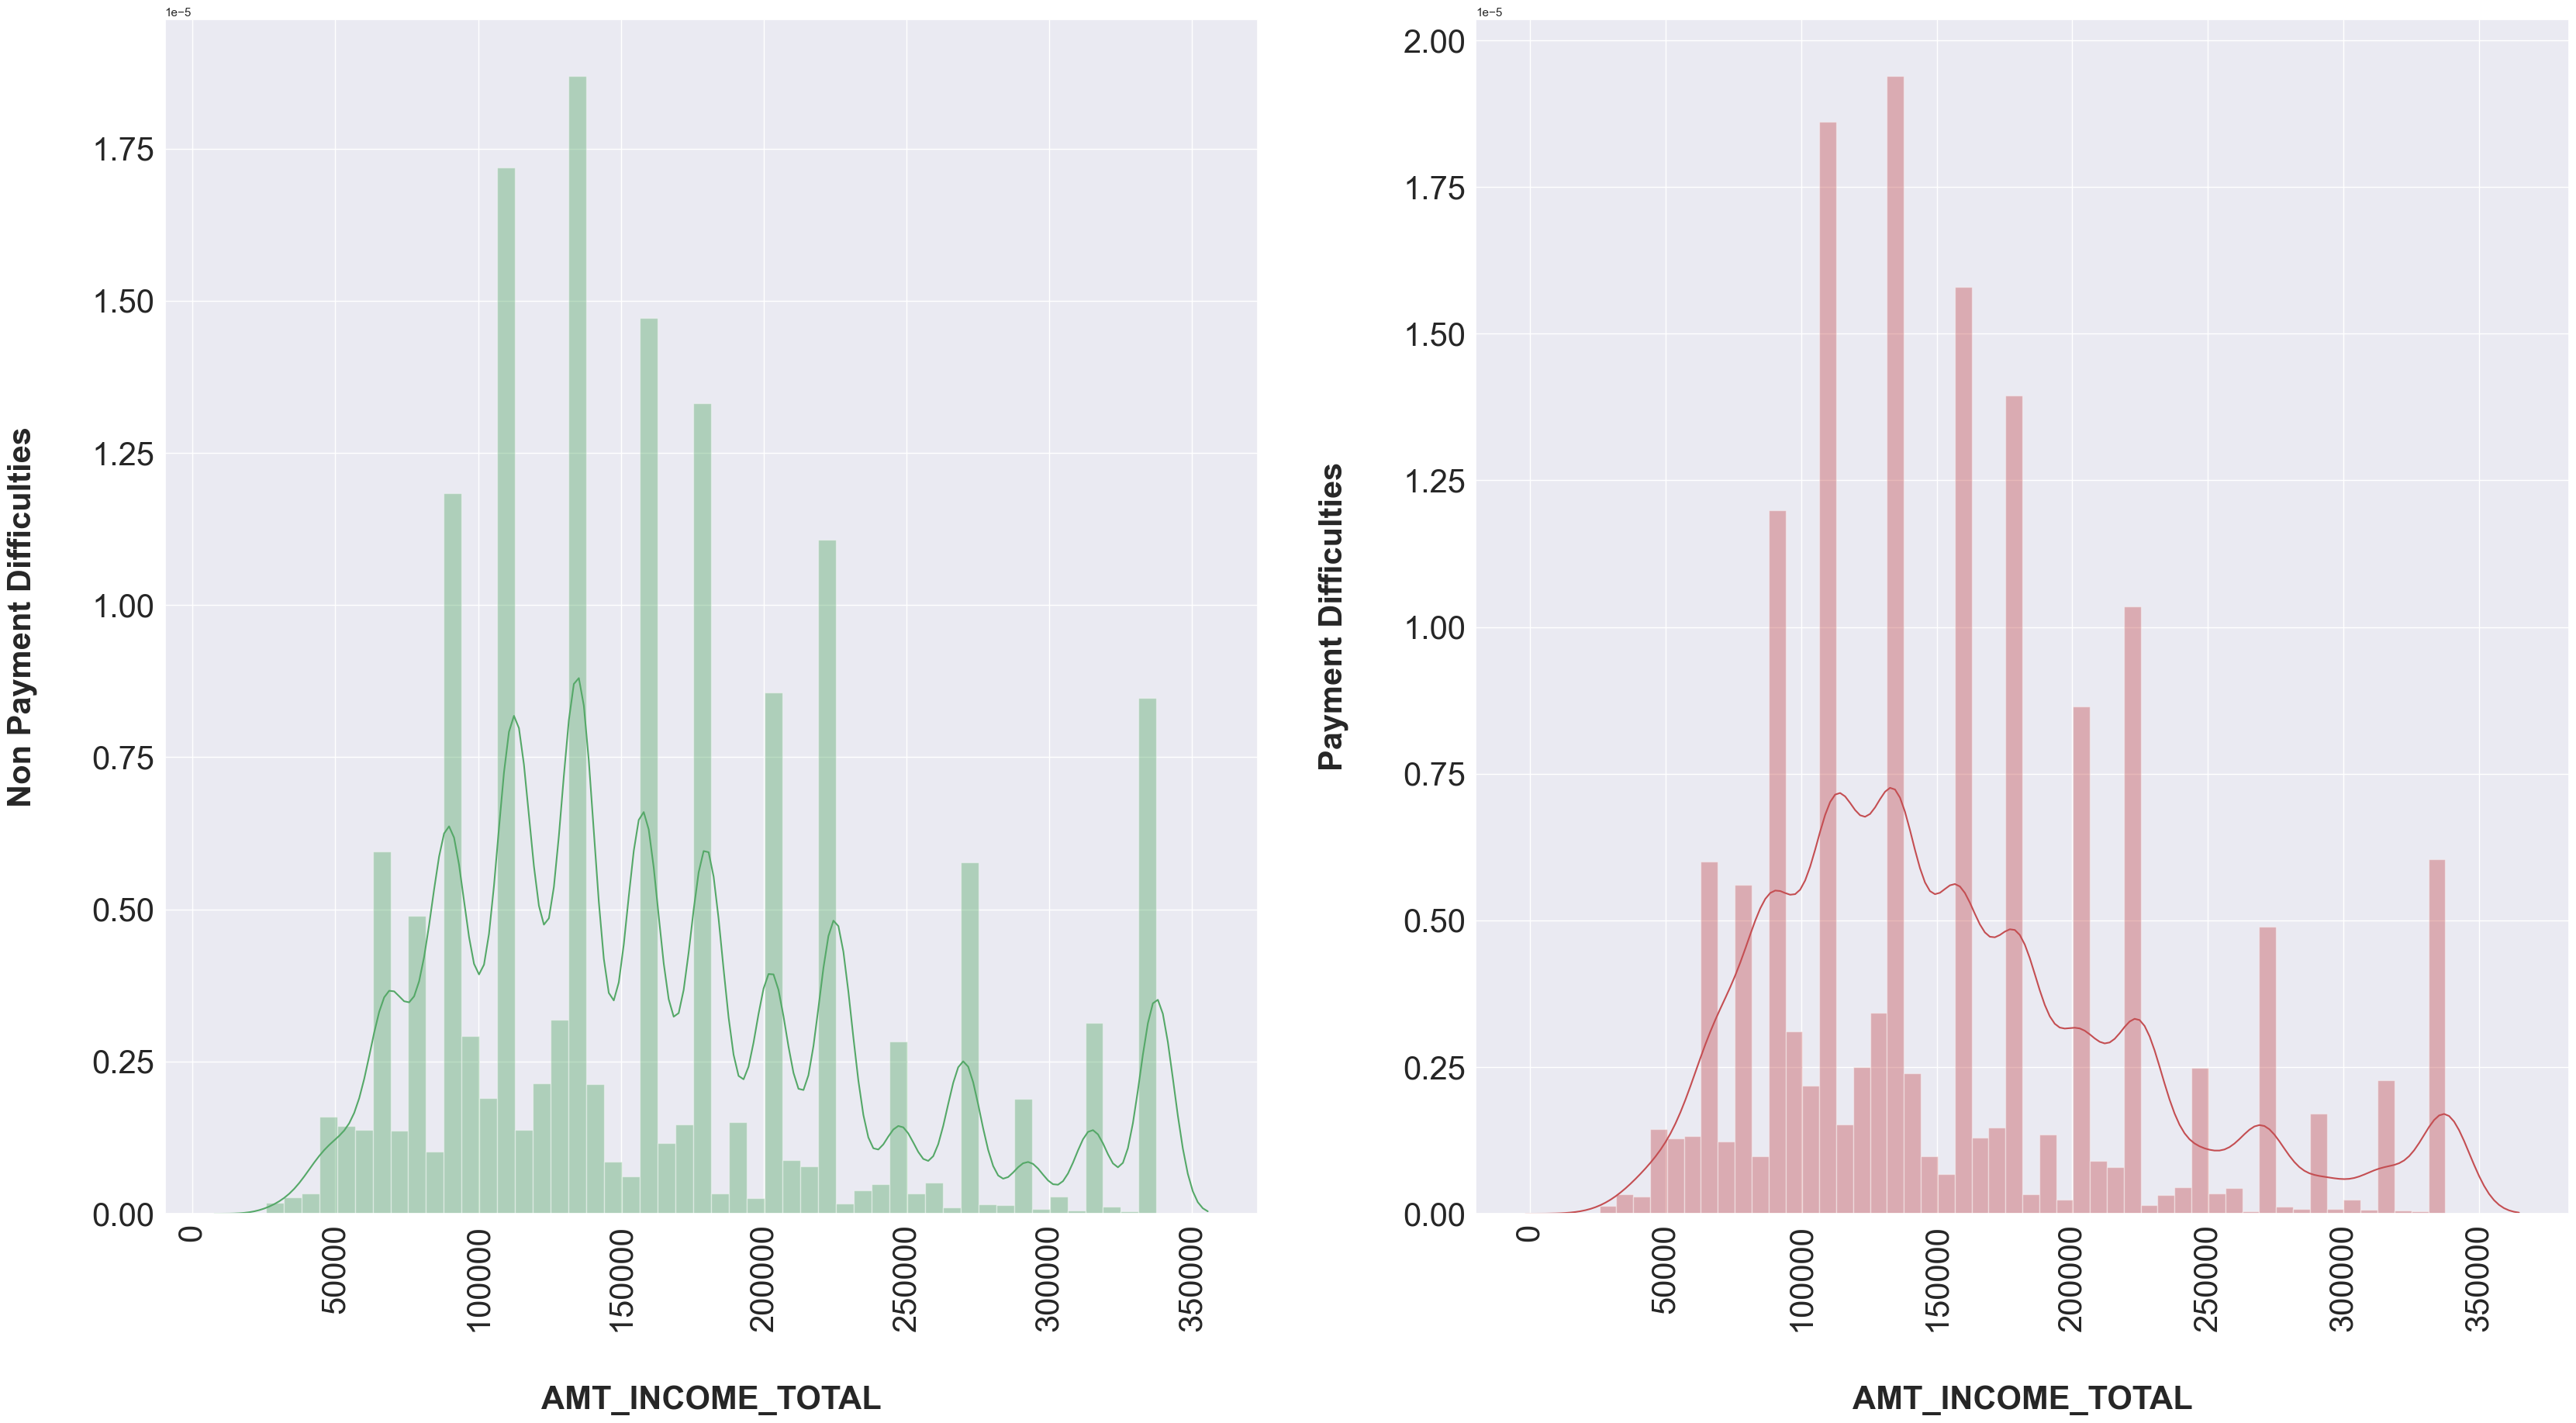

In [15]:
uni(col='AMT_INCOME_TOTAL') 

## Insight:

- People with target one has largely  staggered income as compared  to target zero. Dist. plot clearly  shows that the shape in Income  total, Annuity, Credit and Good  Price are similar for Target 0 and  similar for Target 1.


- The plots are also highlighting that  people who have difficulty in  paying back loans with respect to  their income, loan amount, price  of goods against which loan is  procured and Annuity.


- Dist. plot highlights the curve  shape which is wider for Target 1  in comparison to Target 0 which is  narrower with well defined edges.

# 2 Bivariate Analysis : Numerical & Categorical W.R.T Target variables

** Checking Required columns for Analysis**

In [16]:
df[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307287       0          157500.0  Secondary / secondary special   
307288       0           72000.0  Secondary / secondary special   
307289       0          153000.0               Higher education   
307290       1          171000.0  Secondary / secondary special   
307291       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307287             Separated  
307288                 Widow  
307289             Separated  
307290               Married  
307291               Married  

[307292 rows x 4 columns]

## 2.1 For Target 0

### 2.1.1  Income_Amount   Vs   Eduacation_Status    Vs   FAMILY_Status  for No-payment diffculties client (Trget 0)

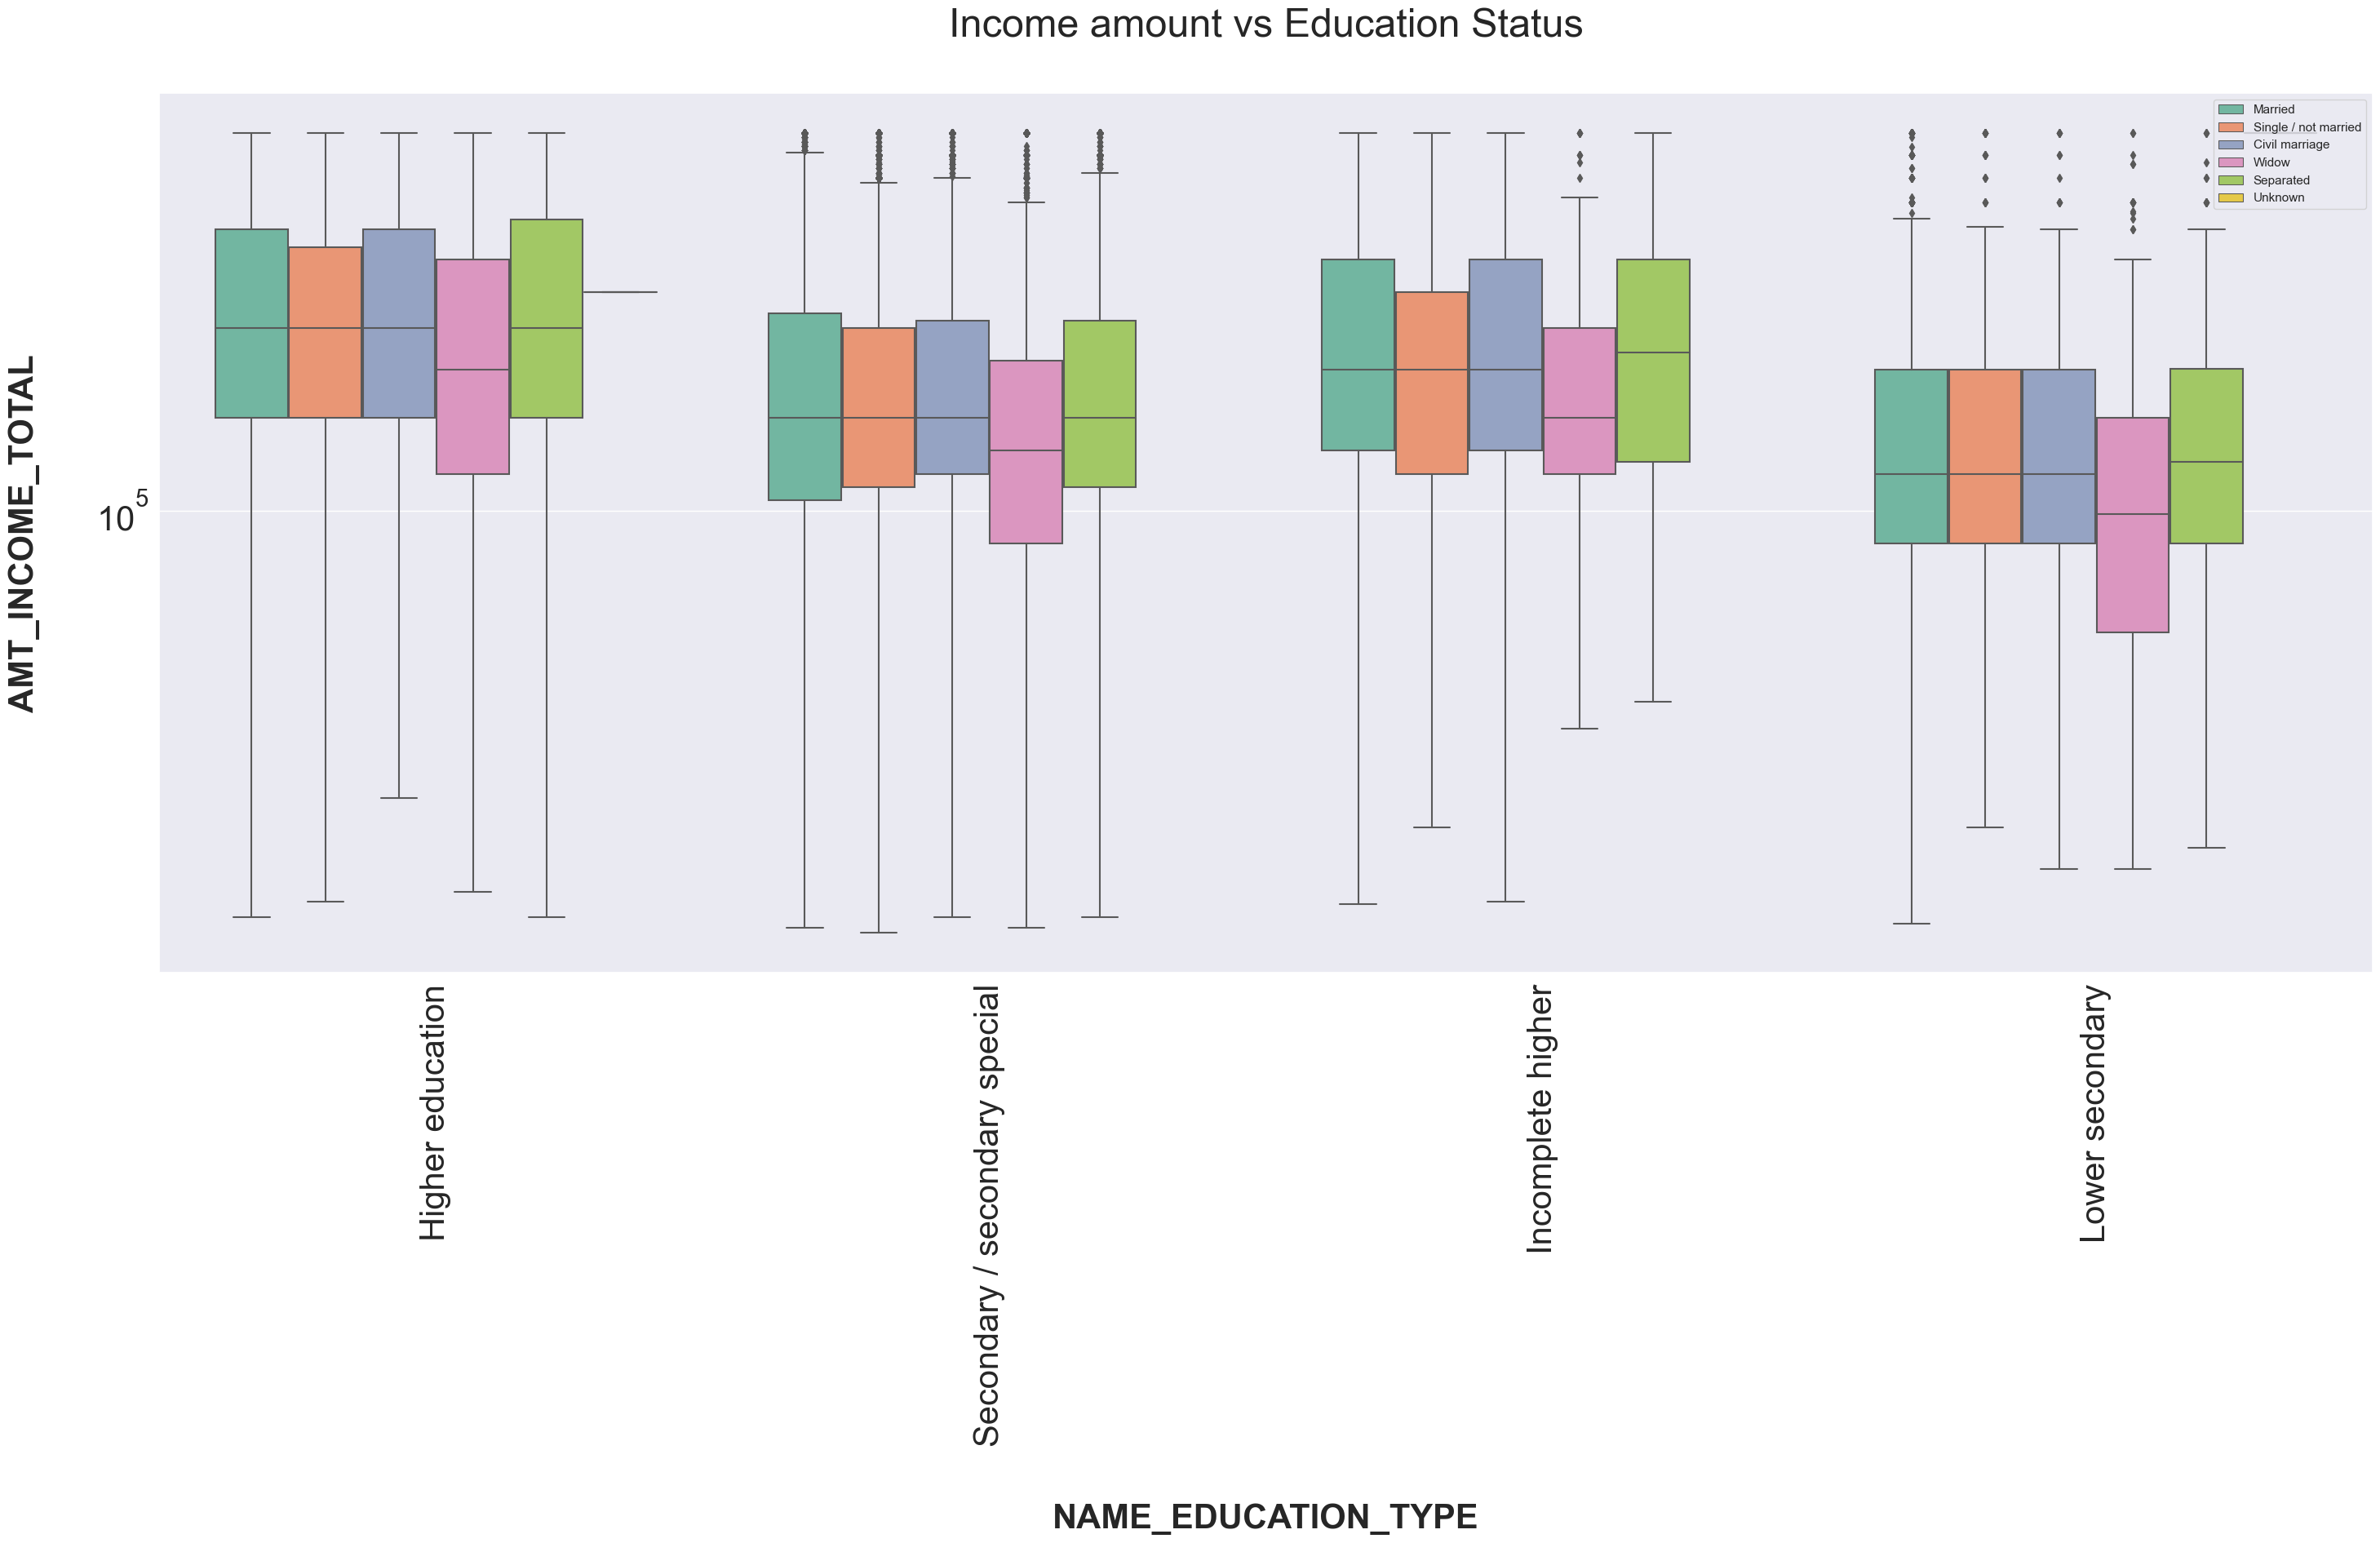

In [17]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights:

-  Widow Client with Academic degree have a **very few outliers** and doesn't have First and Third quartile.Also Clients with all type of **family status having academic degree** have very **less outliers** as compared to other type of **education**.


-  Income of the clients with all type of family status having rest of the education type lie Below the First quartile i.e. **`25%`**


-  Clients having Higher **Education**, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a **higher number of outliers**.


-  From the above figure we can say that, some of the clients **having Higher Education tend to have highest Income compared to others.**


-  Though some of the clients who **haven't completed their Higher Education** tend to have **higher Income**.


-  Some of the clients having **Secondary/Secondary Sepcial Eduacation** tend to **have higher income**.

###  2.1.2 Credit Amount Vs Eduacation status Vs  FAMILY_Status   WRT  data Target 0

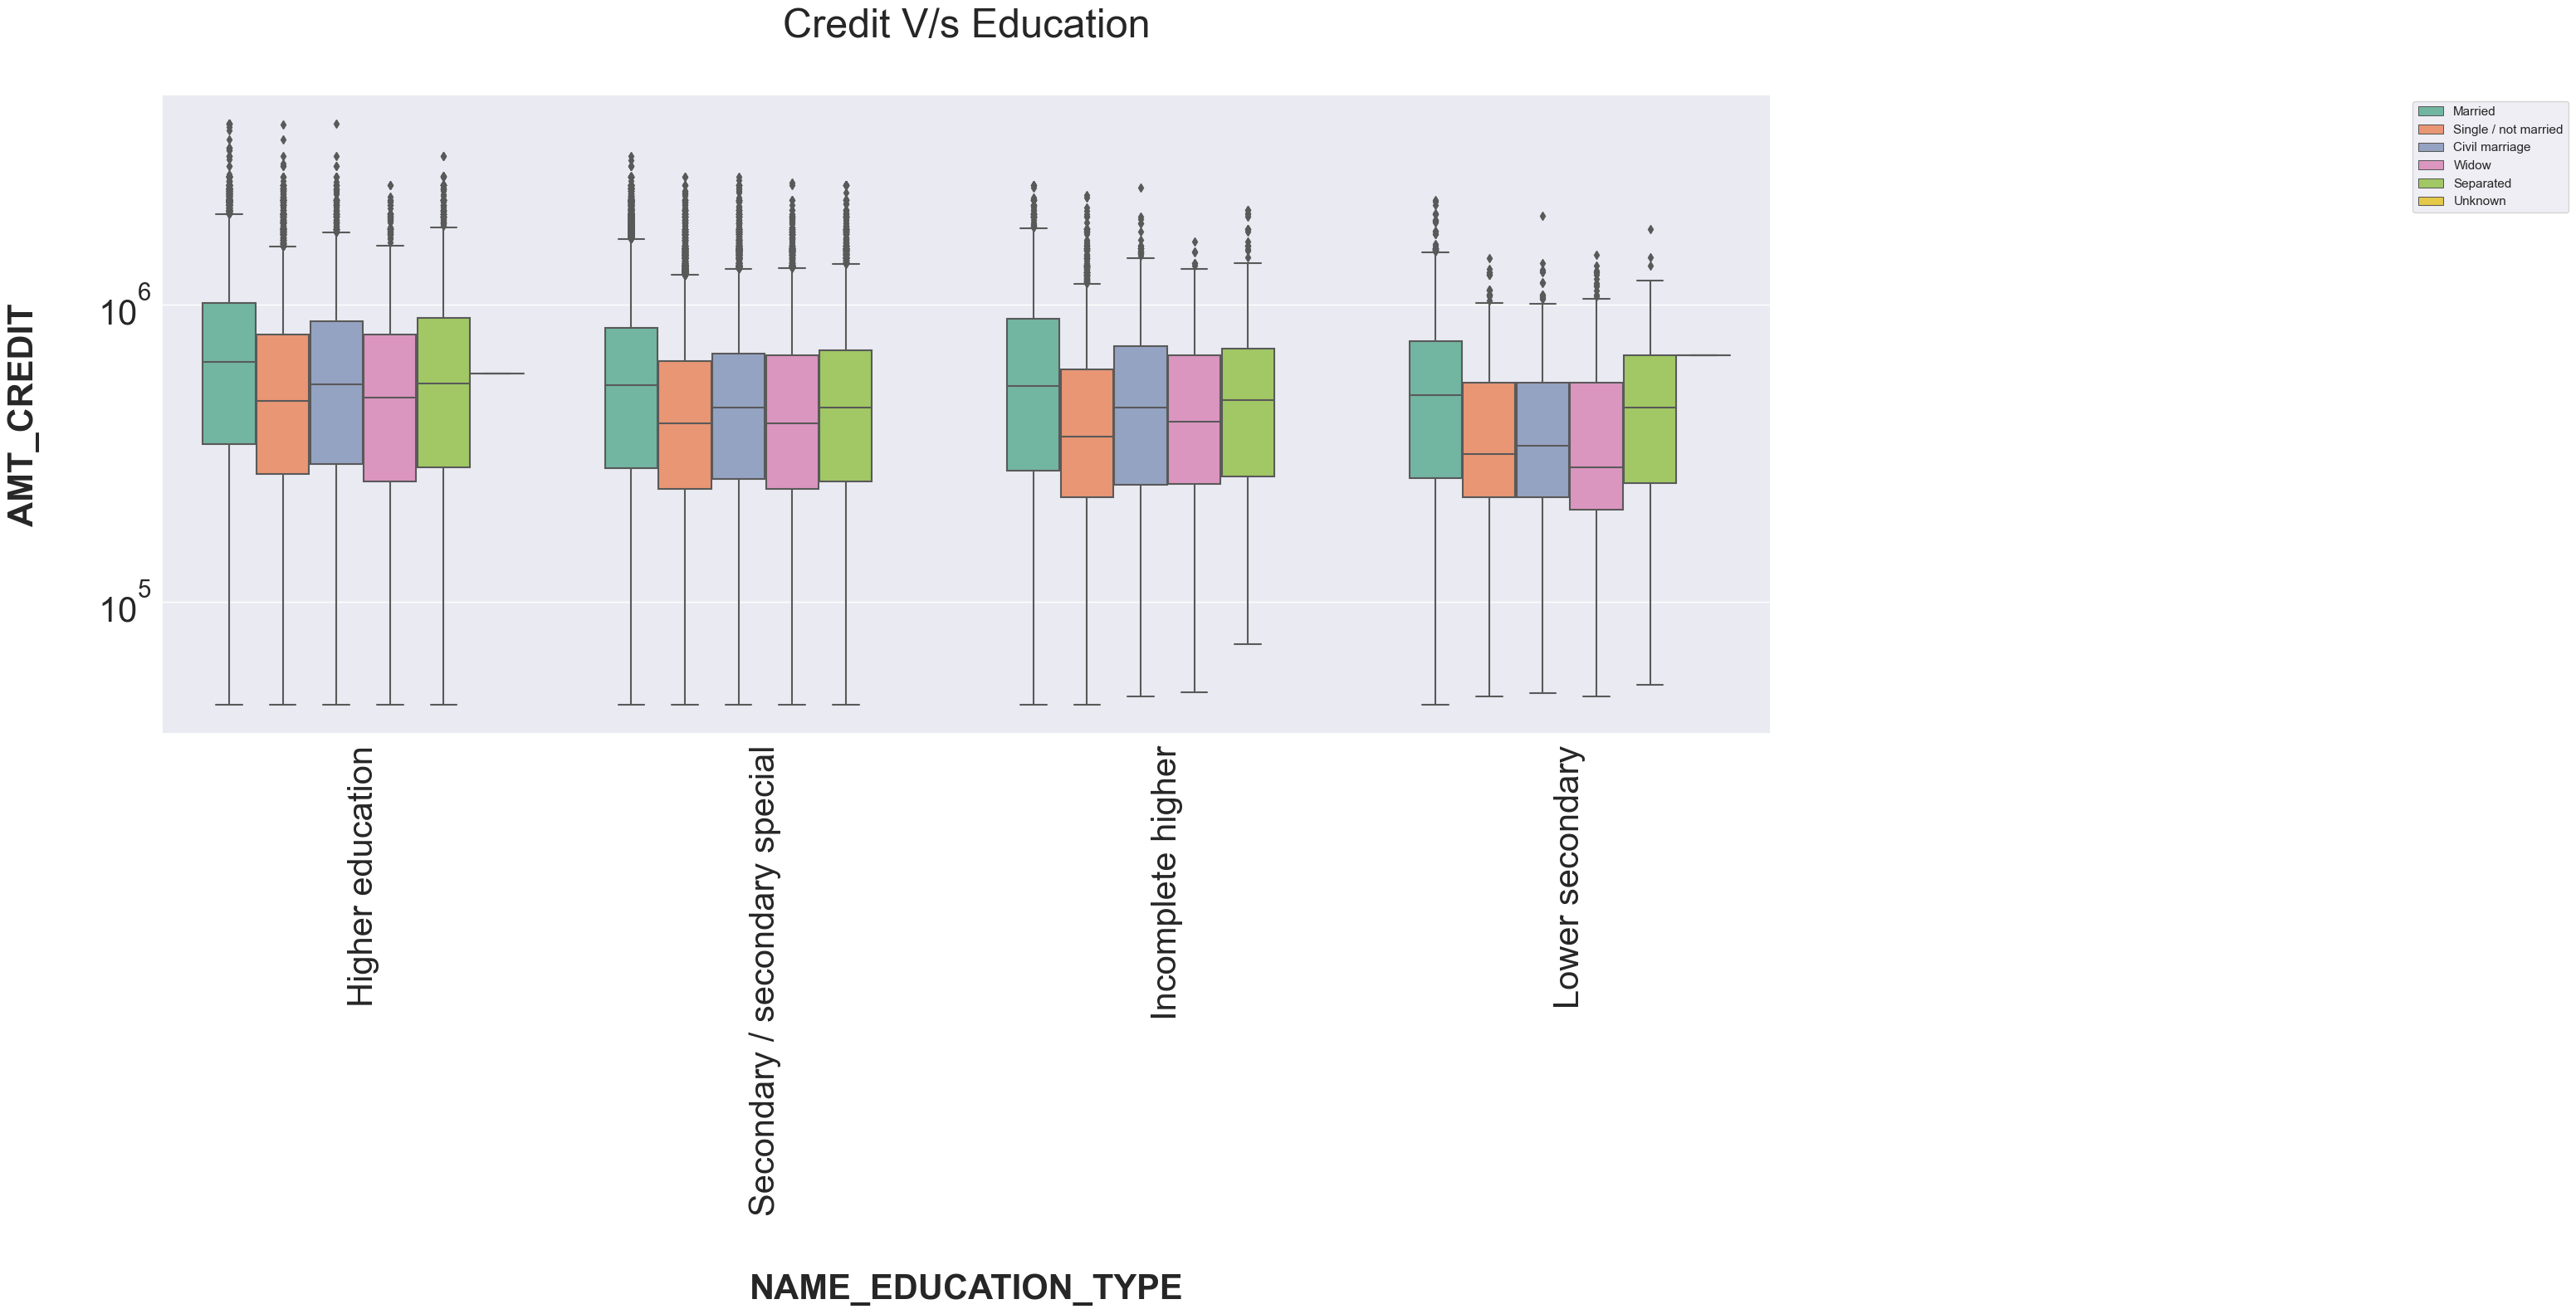

In [18]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights:

- Clients with different **Education** type except **Academic degree** have large number of outliers**


- Most of the population i.e. cliends **credit amounts** lie below **25%.**


- Clients with **Academic degree** and who is a widow tend to take **higher** credit loan.**


- Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Eduacation are more likely to take **high amount of credit loan.**

## 2.2 For Target 1

### 2.2.1 Income_Amount   Vs   Education_Status    Vs   FAMILY_Status  for payment diffculties client (Target 1)

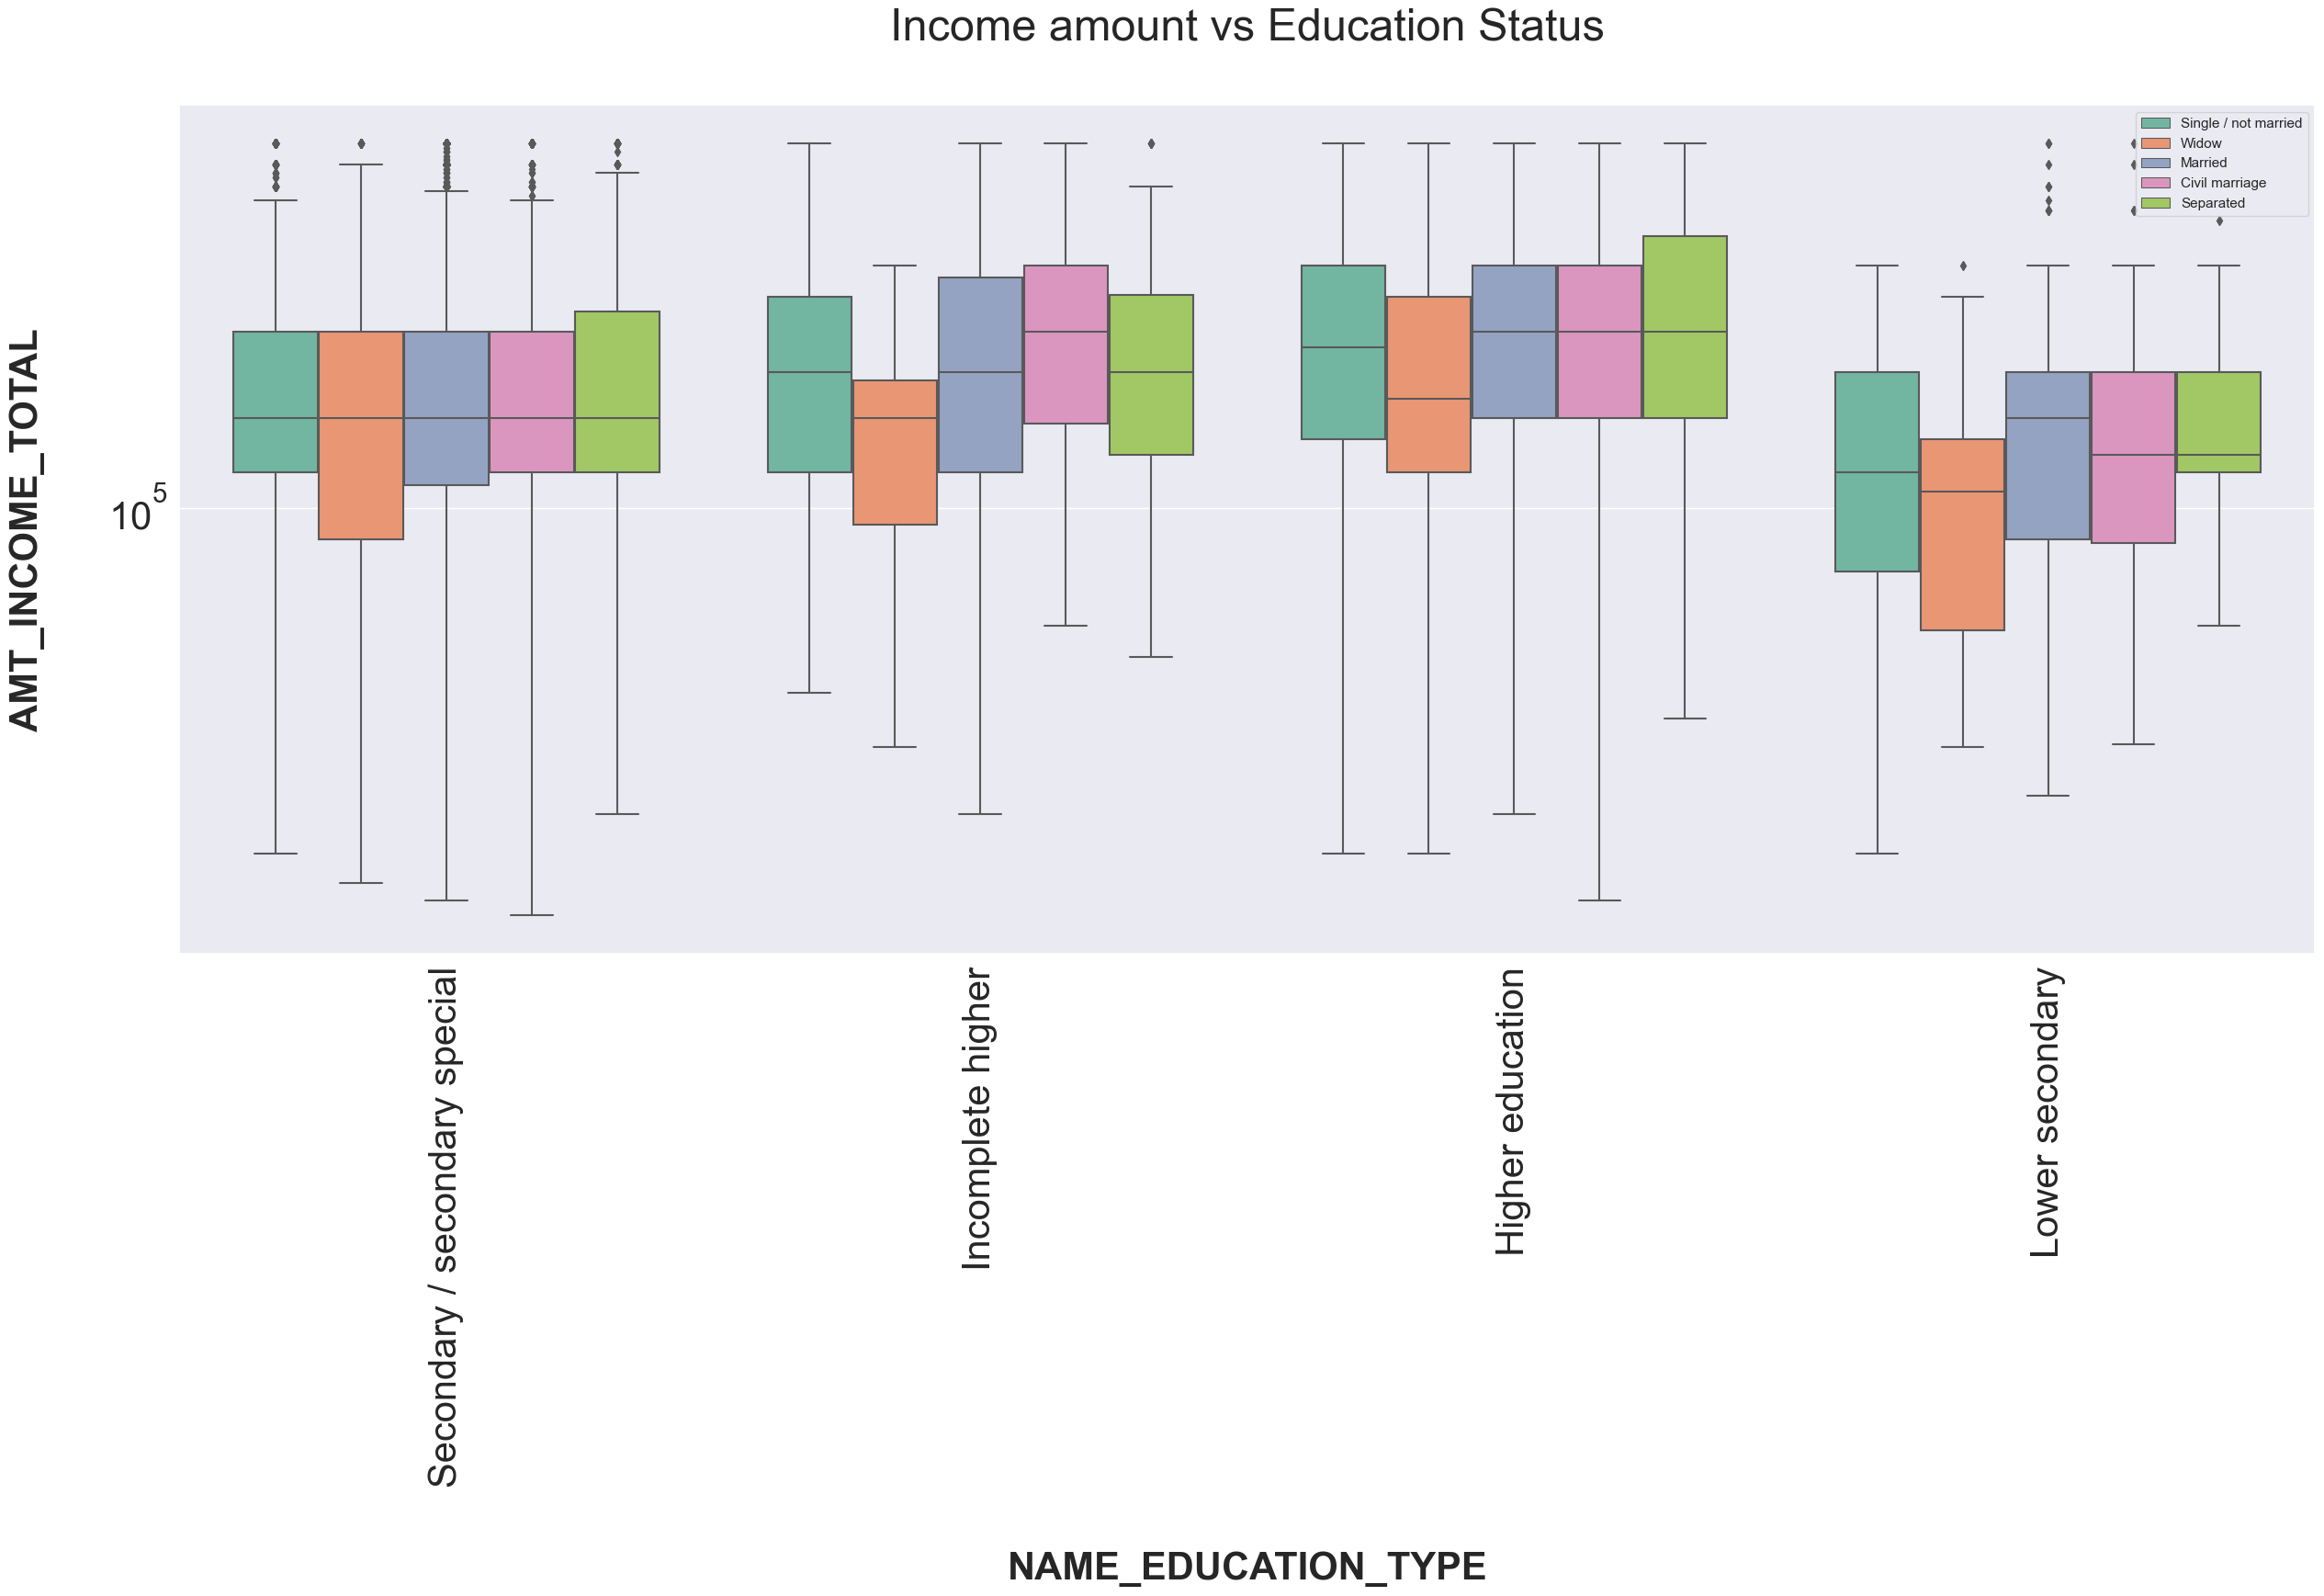

In [19]:
plt.figure(figsize=(30,12)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights:

- **Income amount** for Married clients with academic degree is much lesser as compared to others.


- **(Defaulter)** Clients have relatively less income as compared to **Non-defaulters.**


### 2.2.2 Credit Amount Vs Eduacation status Vs  FAMILY_Status   WRT  data Target 1

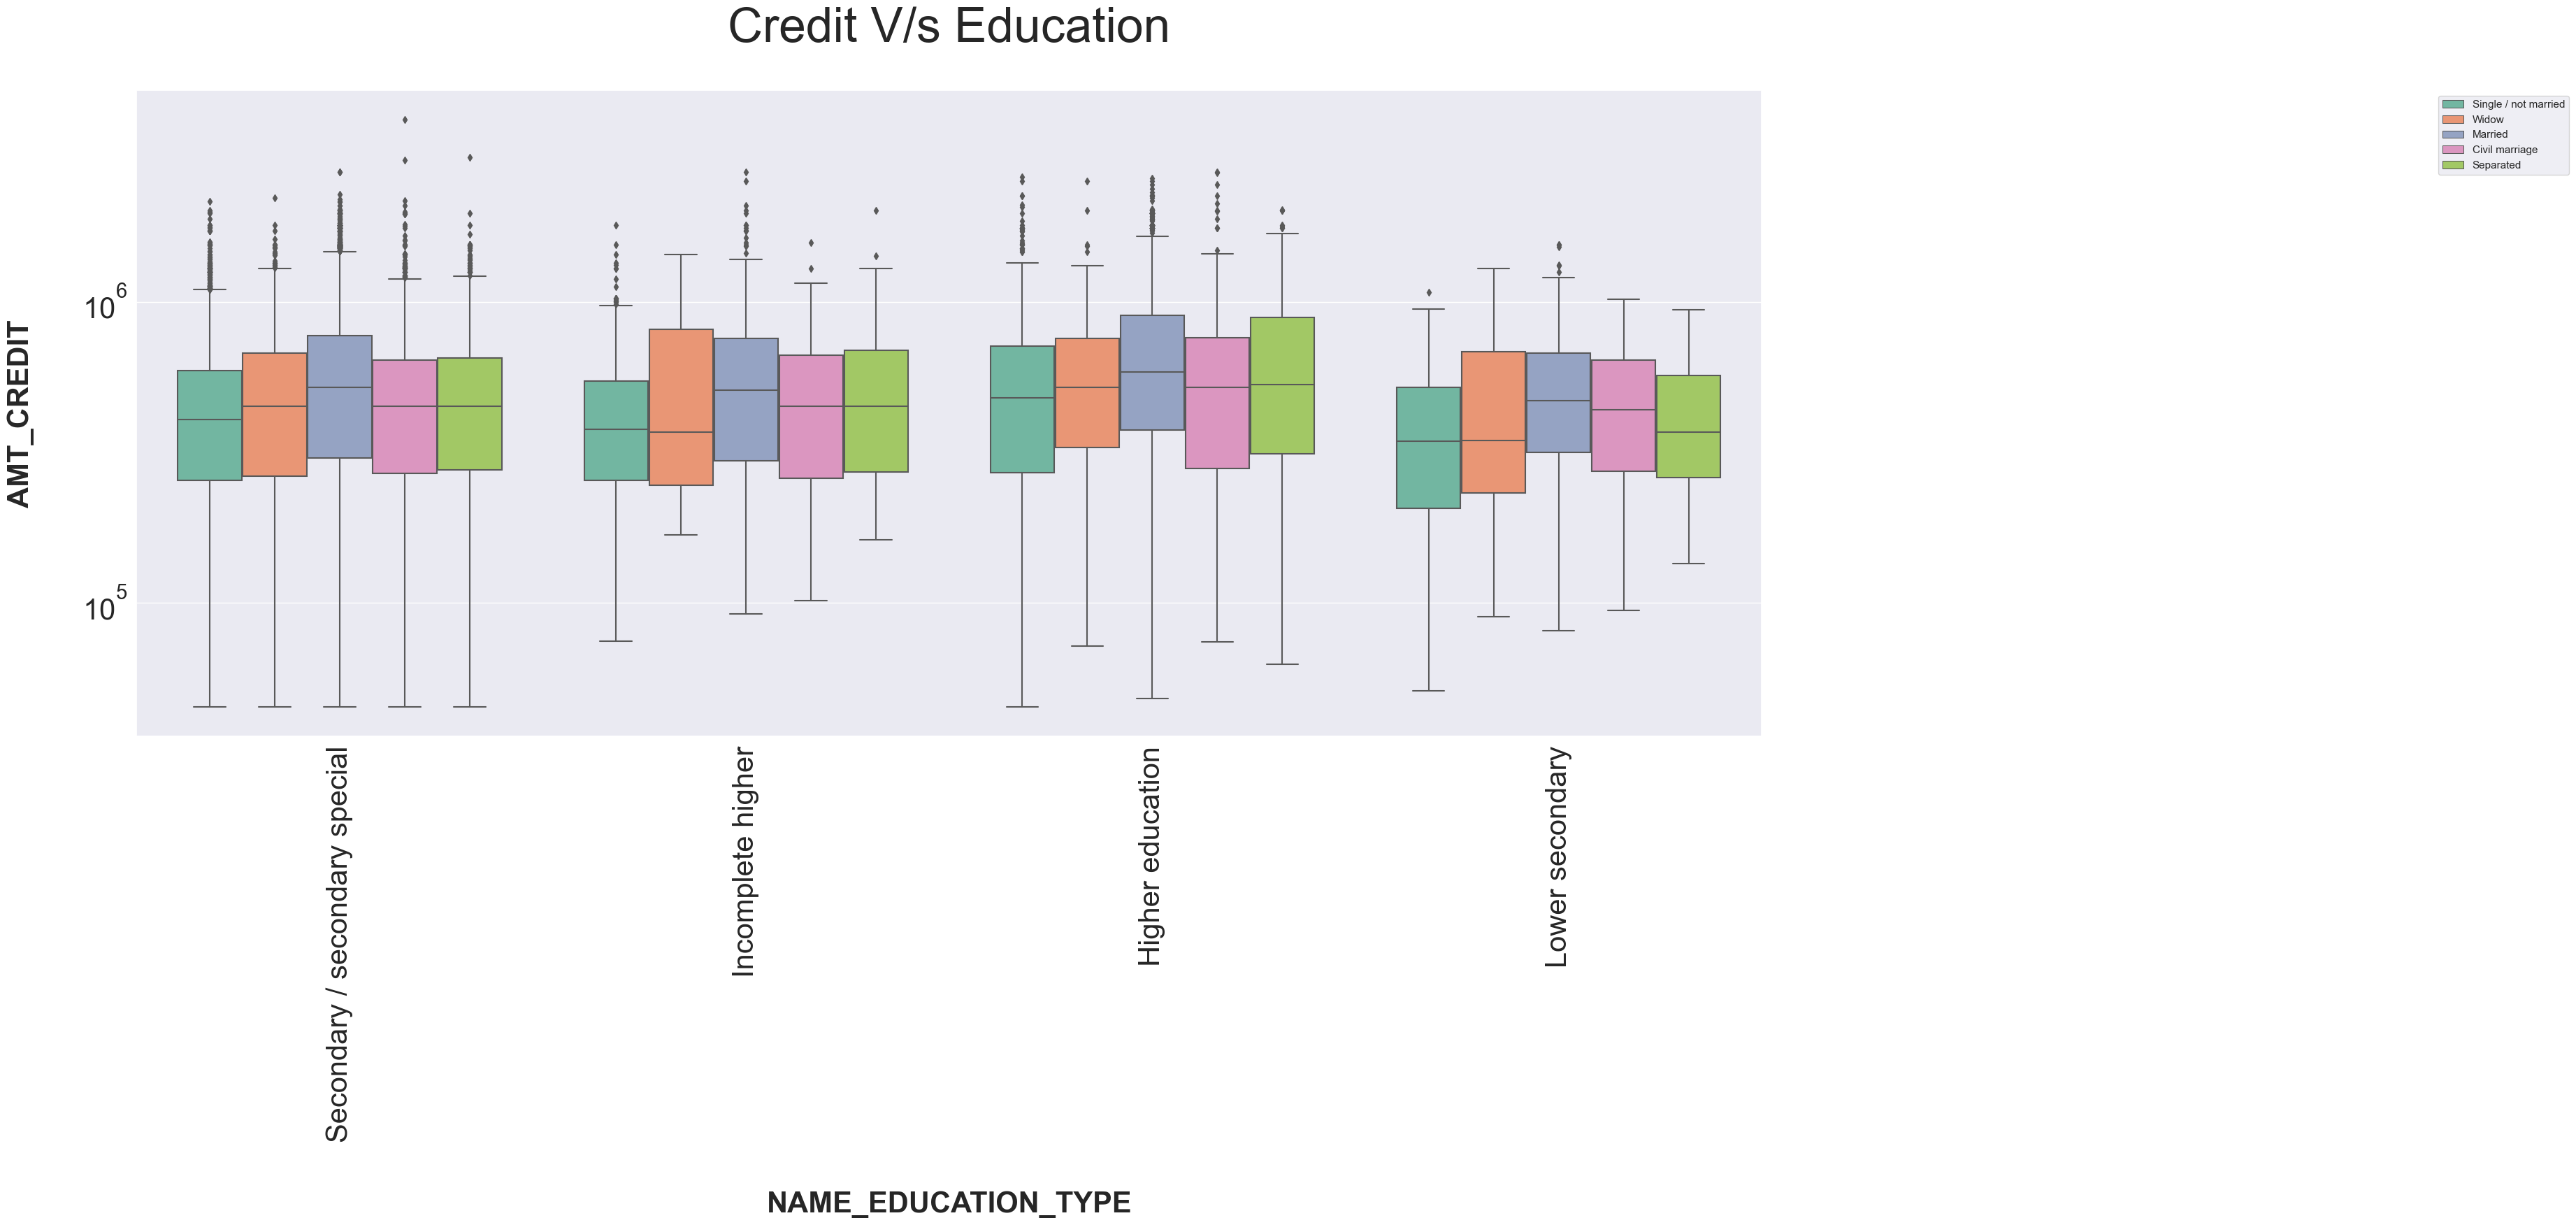

In [20]:
plt.figure(figsize=(30,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights:

- Married client with academic applied for **higher credit loan**. And doesn't have outliers.Single clients eith **academic degree have a very slim boxplot with no outliers**.


- Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Eduacation are more likely to take **high amount of credit loan**.

# 3 . Bivariate Analysis of Categorical-Categorical to find the Maximum % Clients with  Loan-Payment Difficulties

## 3.0 Function for bivariate plots  

In [21]:
def biplot(df,feature,title):
    temp = df[feature].value_counts()
    
# Calculate the percentage of target=1 per category value    

    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean() 
    perc.sort_values(by='TARGET', ascending=False, inplace=True)
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))
    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=False)
    fig.show()

## 3.1 Distribution of Amount Income Range and the category with maximum %  Loan-Payment Difficulties

In [22]:
biplot(df ,'NAME_INCOME_TYPE','Income range')

## Insight:
    
- **Clients having Low income have high risk to default** followed by **clients with medium and very low income.**



- **Clients with  high salaries have minimal risk to default.**

## 3.2 Distribution of Type of Income  and the category with maximum Loan-Payment Difficulties

In [23]:
biplot(df ,'NAME_INCOME_TYPE','Income type')

## Insights:
- Though count of **working clients** applying for loan is significantly high , **risk to default in payments is less** as compared to others


- **Count of clients with income type Maternity leave is only 5**, but **risk to default in payments for those is minimum** among all the 
    income types.
    
    
- Same condition is observed in case of **unemployed**.Though count is very low,**risk to default in payments  is low**.


- **Pensioner**,**State servant** and **Commercial associate** have higher risk to default.


## 3.3 Distribution of Contract Type and the category with maximum Loan-Payment Difficulties

In [24]:
biplot(df ,'NAME_CONTRACT_TYPE','Contract type')

## Insights:

- **Cash loans** have higher risk to default, Revolving loans have comparatively lower risk for the same .


## 3.4 Distribution of Education Type and the category with maximum Loan-Payment Difficulties

In [25]:
biplot(df ,'NAME_EDUCATION_TYPE','Education type')

## Insights:

- Clients having Academic Degree and higher Education have **lower risk to default.**


- Clients having Lower Secondary , Secondary/Secondary Special Education have **very high risk to default.**

## 3.5 Distribution of Housing Type and the category with maximum Loan-Payment Difficulties

In [26]:
biplot(df ,'NAME_HOUSING_TYPE','Housing type')

## Insights:


- Applicants living in House/Apartments has the highest number of loan application.While we see that Rented apartment and applicants living with parents have **very high percentage to default**


## 3.6 Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties

In [27]:
biplot(df ,'OCCUPATION_TYPE','Occupation type')

## Insights:

- **Low-skill Laborers** have **higher risk to default**


- **Managers**, **High skill** **tech staff** and **Accountants** have relatively **lower risk to default**

## 3.7 Distribution of CODE_GENDER with respect to AMT_INCOME_RANGE  to find maximum % Loan-Payment Difficulties using pivot table

In [28]:
table= pd.pivot_table(df, values='TARGET', index=['CODE_GENDER','NAME_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

table

NAME_EDUCATION_TYPE               Higher education  Incomplete higher  \
CODE_GENDER NAME_INCOME_TYPE                                            
F           Commercial associate          0.047413           0.075573   
            Pensioner                     0.036646           0.040302   
            State servant                 0.036711           0.069388   
            Working                       0.055972           0.089141   
M           Commercial associate          0.059253           0.091988   
            Pensioner                     0.057246           0.057851   
            State servant                 0.044538           0.064286   
            Working                       0.072749           0.097681   
XNA         Commercial associate               NaN           0.000000   
            Working                       0.000000                NaN   

NAME_EDUCATION_TYPE               Lower secondary  \
CODE_GENDER NAME_INCOME_TYPE                        
F           Commercial associate         0.122271   
            Pensioner                    0.060231   
            State servant                0.112676   
            Working                      0.131414   
M           Commercial associate         0.121212   
            Pensioner                    0.091483   
            State servant                0.000000   
            Working                      0.157667   
XNA         Commercial associate              NaN   
            Working                           NaN   

NAME_EDUCATION_TYPE               Secondary / secondary special  
CODE_GENDER NAME_INCOME_TYPE                                     
F           Commercial associate                       0.076435  
            Pensioner                                  0.051497  
            State servant                              0.064461  
            Working                                    0.091756  
M           Commercial associate                       0.102840  
            Pensioner                                  0.076684  
            State servant                              0.088282  
            Working                                    0.125122  
XNA         Commercial associate                            NaN  
            Working                                    0.000000

## Insights:

- Female clients with **Academic degree and high income type have higher risk to default**


- Male clients with **Secondary/Secondary Special Education** having all types of **salaries have higher risk to default.**


- Male clients with **Incomplete Education having very low salary have high risk to default.**


- Male Clients with Lower **Secondary Education** having **very low or medium have high risk to default**